In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\amogh\Downloads\2010 Federal STEM Education Inventory Data Set.xls',sheet_name='Sheet1',header=1)

In [3]:
# data shape

In [4]:
data.shape

(253, 256)

In [5]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [252]:
#data.isnull().sum()

In [7]:
data_growth = data.iloc[:,6:8]

In [8]:
data_growth.shape

(253, 2)

In [9]:
data.iloc[:,6:8].isnull().sum()

C1) Funding FY2008    22
C2) Funding FY2009     9
dtype: int64

In [10]:
data_growth.describe()

,C1) Funding FY2008,C2) Funding FY2009
count,231.000000,244.000000
mean,24.215027,27.495004
std,185.603047,216.895416
min,0.000000,0.000000
25%,0.688500,0.760072
50%,2.047000,2.211000
75%,8.400399,9.054625
max,2796.835667,3354.390546


In [11]:


null_data = data_growth[data_growth.isnull().any(axis=1)]

In [12]:
data_growth.fillna(0,inplace=True)

In [13]:
data_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
C1) Funding FY2008    253 non-null float64
C2) Funding FY2009    253 non-null float64
dtypes: float64(2)
memory usage: 4.0 KB


In [14]:
def change(x,y):
    change = []
    for i,c in zip(x,y):
        if i != 0:
            change.append(((c-i)/i))
        else:
            change.append((c-i))
    return change

In [15]:
growth = change(data_growth['C1) Funding FY2008'],data_growth['C2) Funding FY2009'])

In [16]:
data['growth'] = growth

In [17]:
data['growth'] = data['growth'].apply(lambda x:1 if x > 0 else 0)

In [18]:
len(growth)

253

In [19]:
len(data)

253

In [20]:
data_growth['growth'] = growth

In [21]:
data_growth['growth'] = data_growth['growth'].apply(lambda x:1 if x > 0 else 0)

In [22]:
data[1:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Columns: 257 entries, Index Number to growth
dtypes: float64(13), int64(1), object(243)
memory usage: 28.2+ KB


In [23]:
data_growth['C1) Funding FY2008'].sum()

5593.6713340000015

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 257 entries, Index Number to growth
dtypes: float64(13), int64(1), object(243)
memory usage: 508.1+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

In [26]:
data.fillna('Not applicable',inplace=True)

In [27]:
data.drop('Index Number',inplace=True,axis=1)

In [28]:
for i in data.columns:
    #data[i] = le.fit_transform(data[i].astype(str))
    if data[i].dtype == np.object:
        print(i)
        data[i] = L.fit_transform(data[i].astype(str))
    else:
        pass

Investment Name
Agency
Subagency
A) Brief Description
B) Year Established
C1) Funding FY2008
C2) Funding FY2009
D) Mission-specific or General STEM?
E) Agency or Mission-Related Workforce Needs?
F1) Primary Investment Objective
F2) Secondary Investment Objectives
Unnamed: 13
Unnamed: 14
Unnamed: 15
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
G1) Primary Research Approaches
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
G2) Secondary Research Approaches
Unnamed: 28
Unnamed: 29
Unnamed: 30
Unnamed: 31
G3) Research Approaches Not Used
Unnamed: 33
Unnamed: 34
Unnamed: 35
Unnamed: 36
H) Educational Services or Products Produced
Unnamed: 38
Unnamed: 39
Unnamed: 40
Unnamed: 41
Unnamed: 42
Unnamed: 43
Unnamed: 44
Unnamed: 45
Unnamed: 46
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Unnamed: 54
Unnamed: 55
I1) STEM Learners Targeted? Specify.
Unnamed: 57
Unnamed: 58
Unnamed: 59
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
I2)

In [29]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [119]:

def univariate(d):
    
    for i in d.columns:
    
        
        
        x = d[i].value_counts()
        
        
        sns.color_palette("deep", 10)
        fig = plt.figure(figsize=(8,5))
        pat = sns.barplot(x.index,x.values,color="#34495e")
        plt.xlabel(i)
        plt.ylabel('count of the variable')
        plt.title(i)
        
        rects = pat.patches
        labels =x.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            pat.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha='center', va='bottom')

    
    return plt.show()


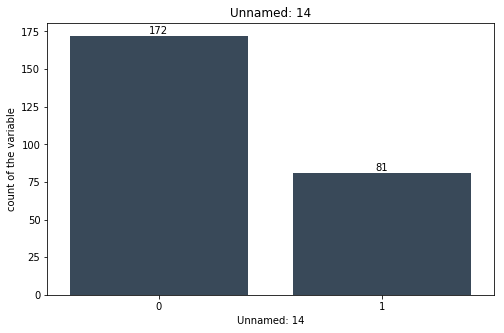

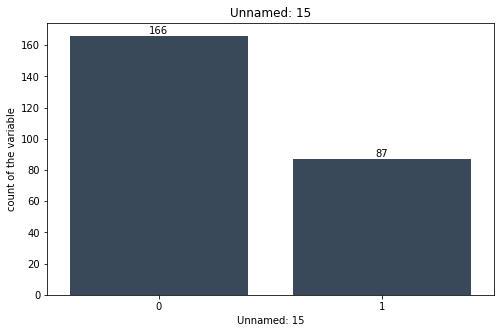

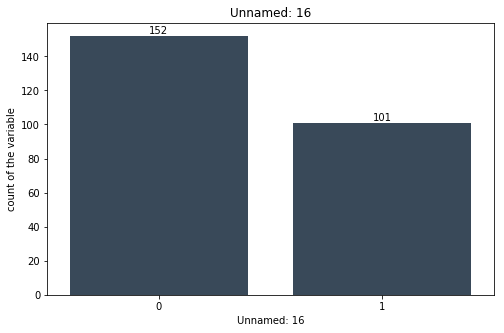

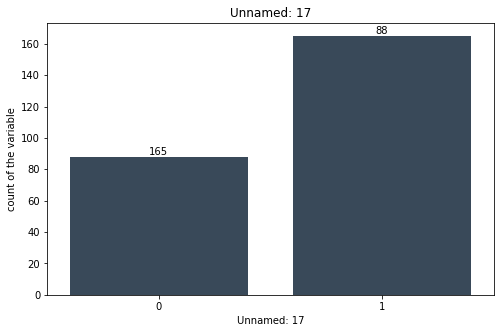

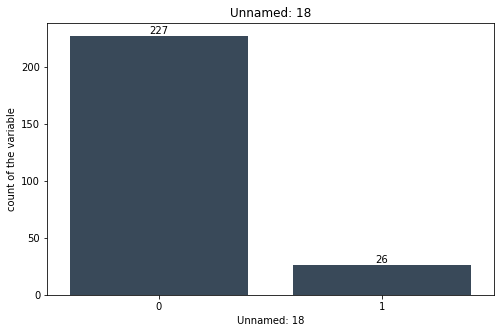

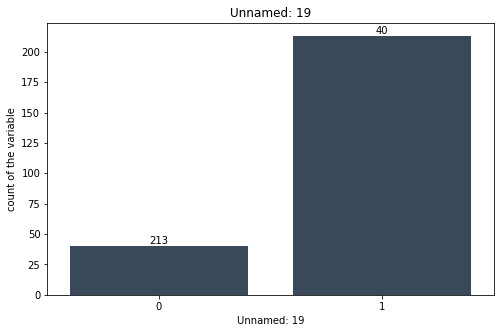

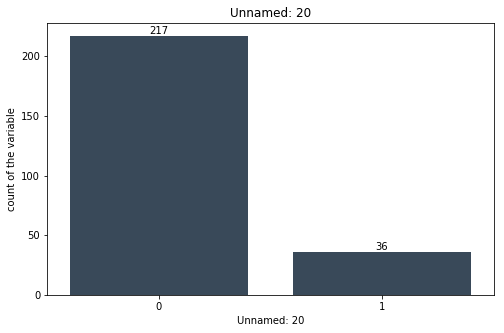

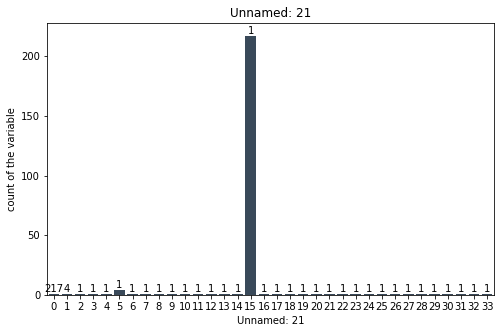

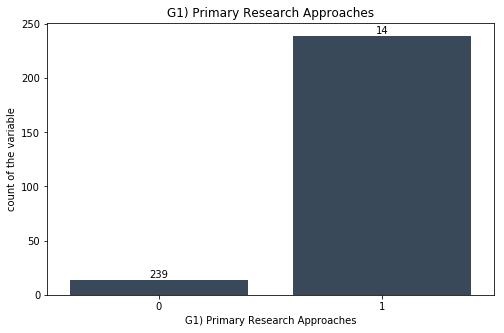

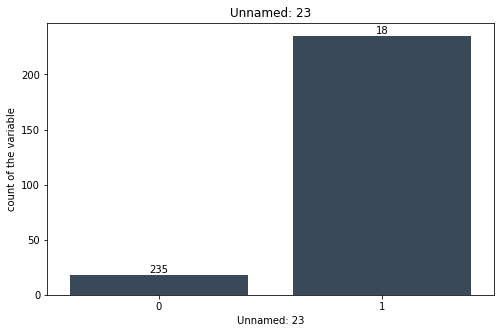

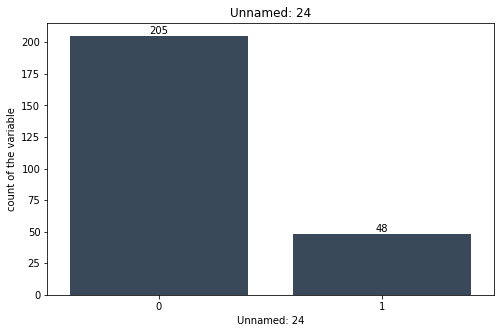

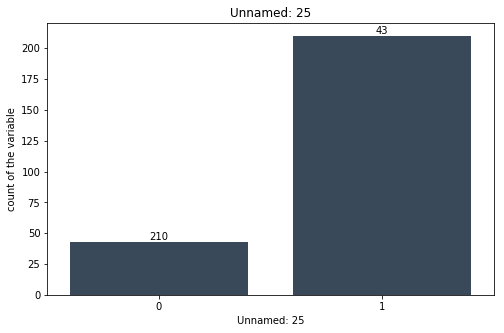

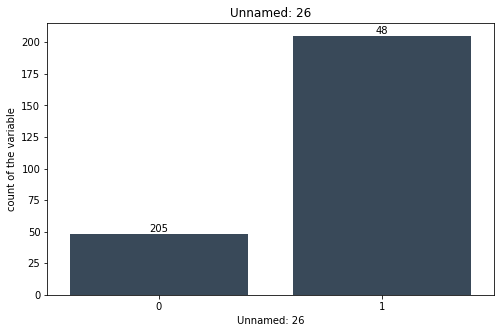

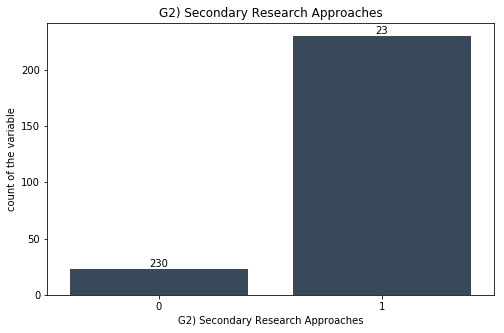

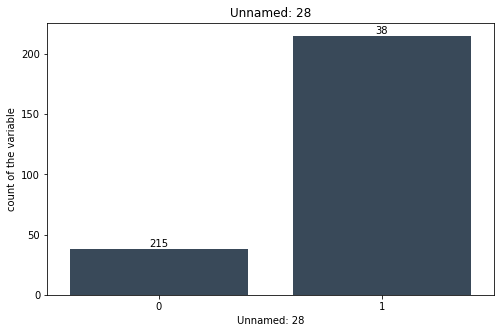

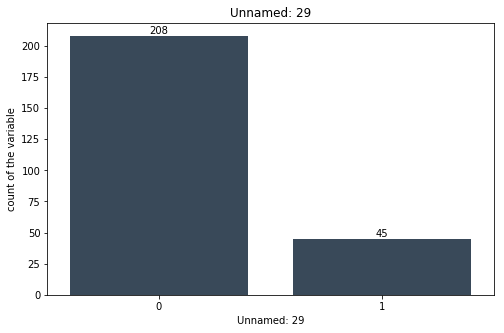

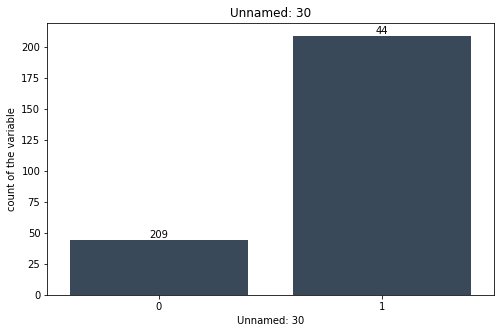

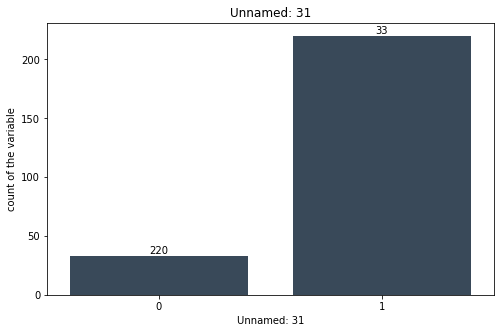

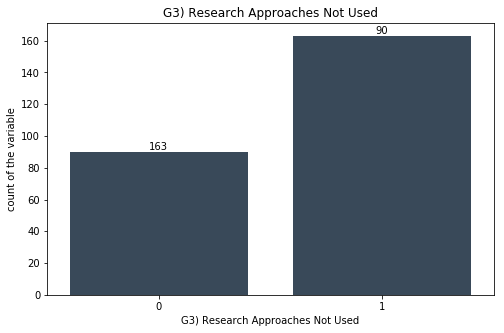

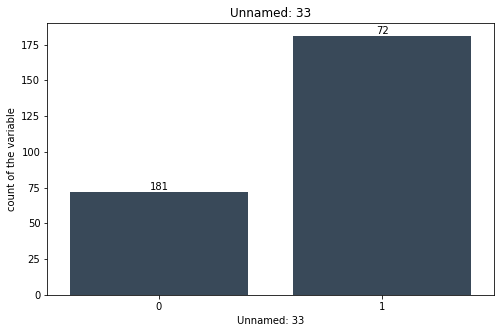

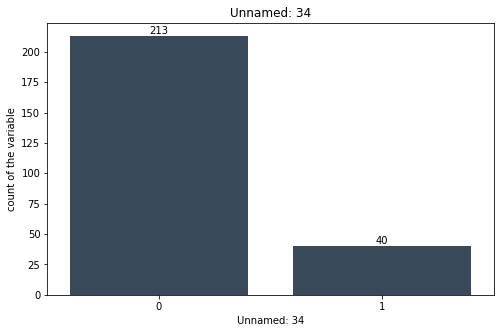

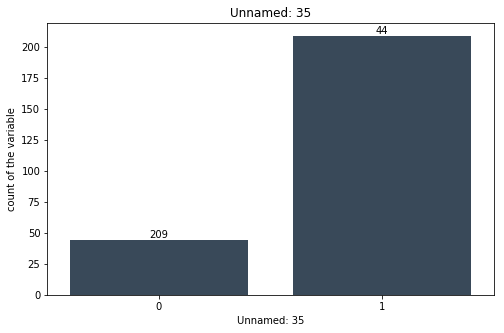

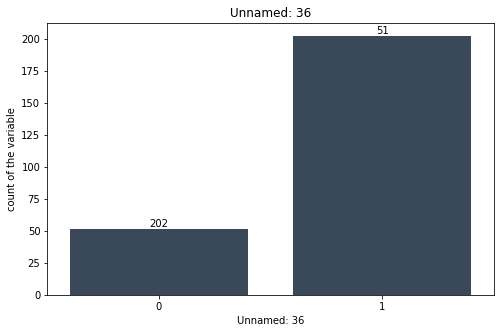

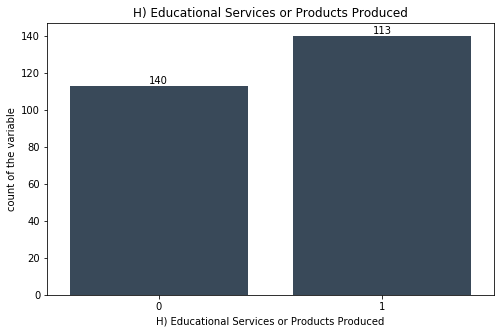

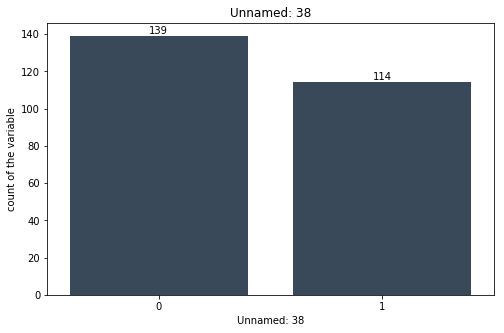

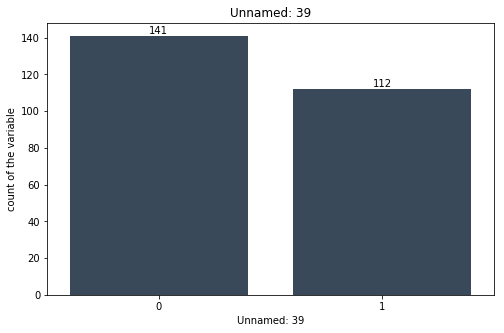

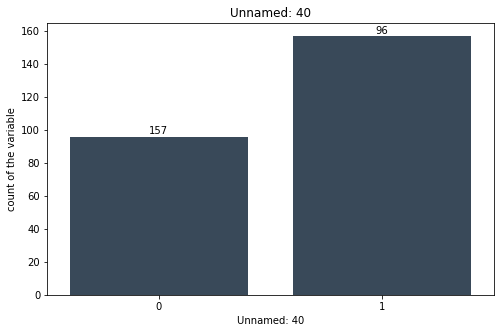

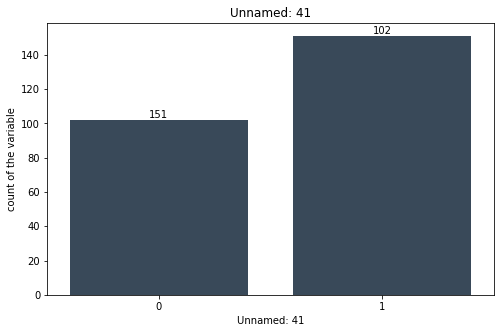

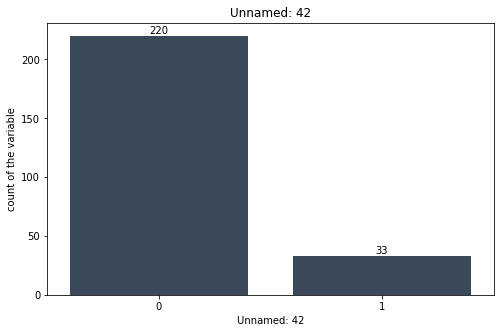

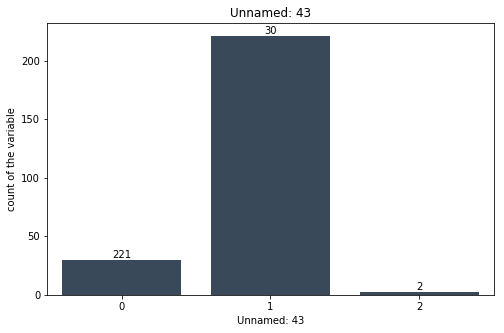

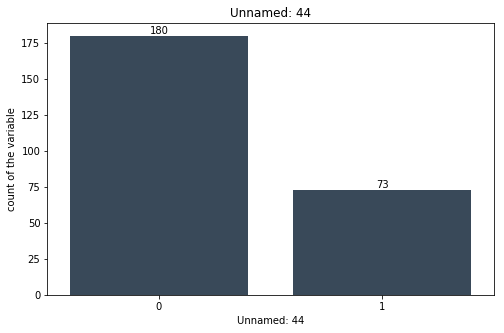

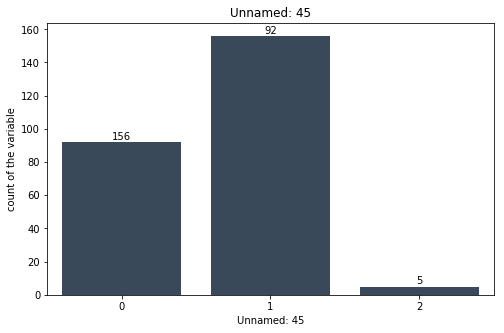

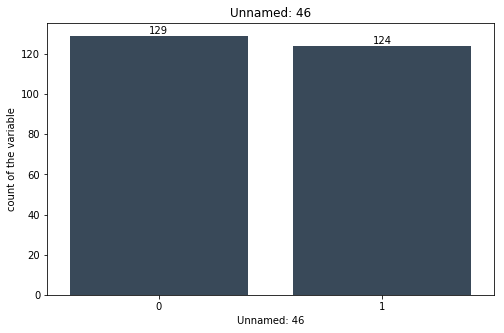

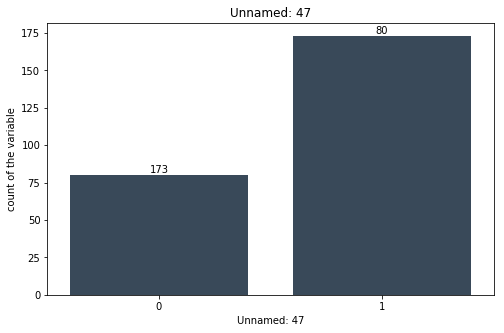

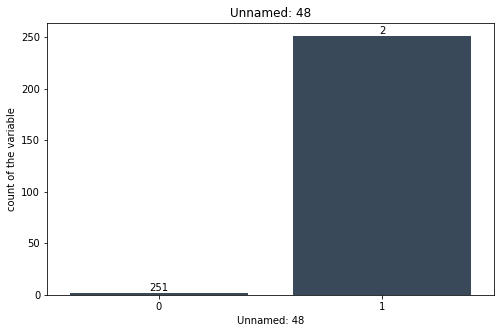

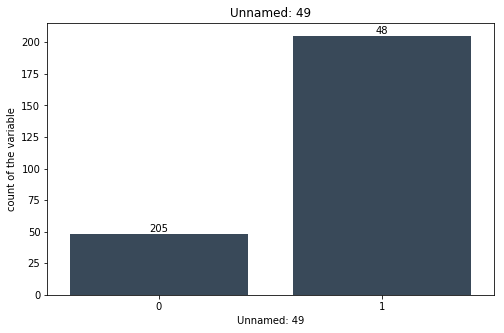

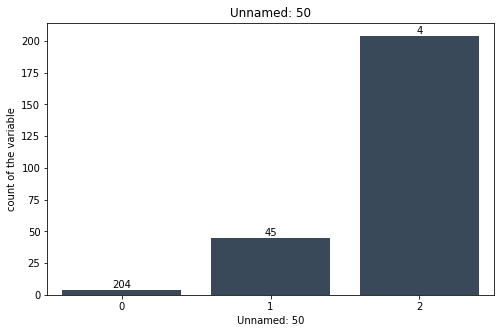

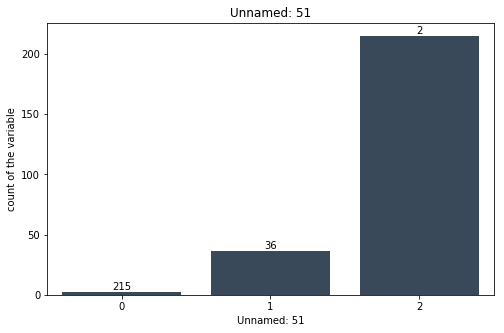

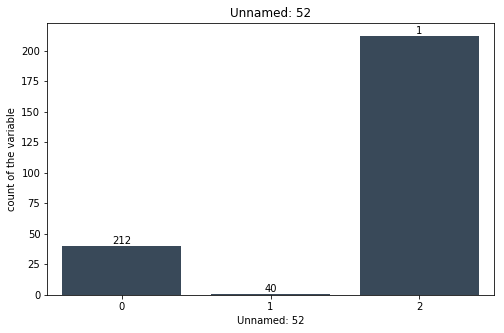

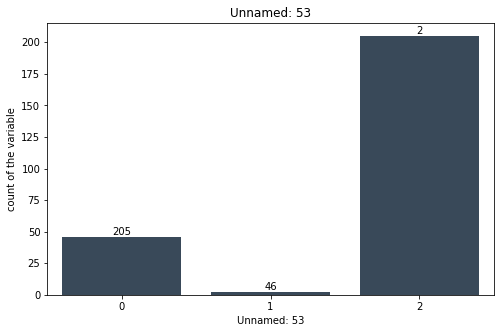

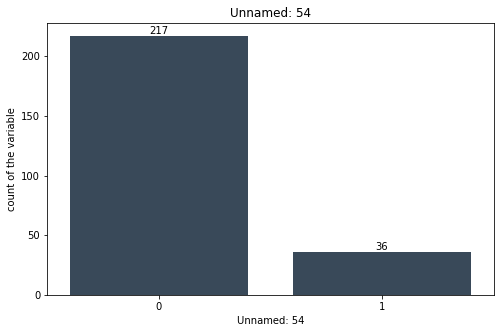

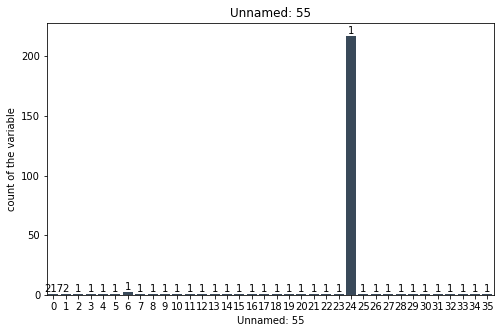

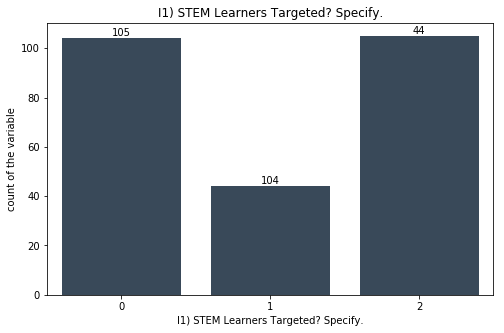

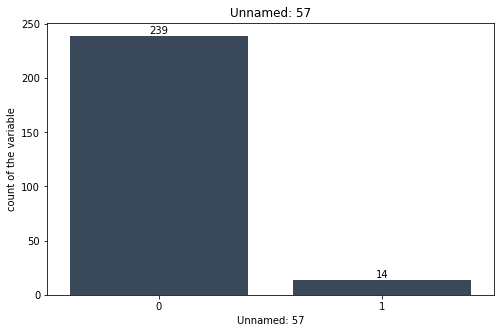

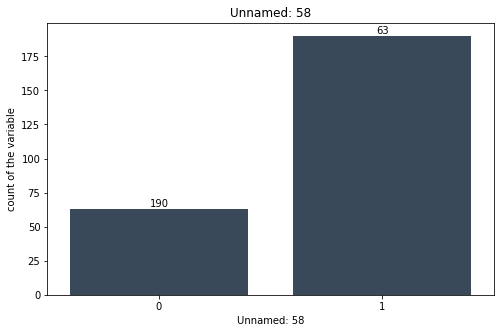

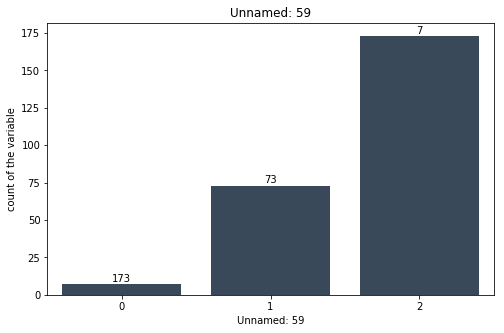

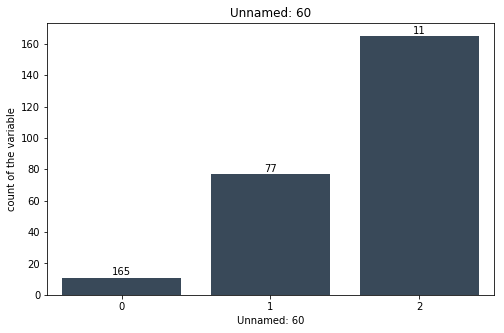

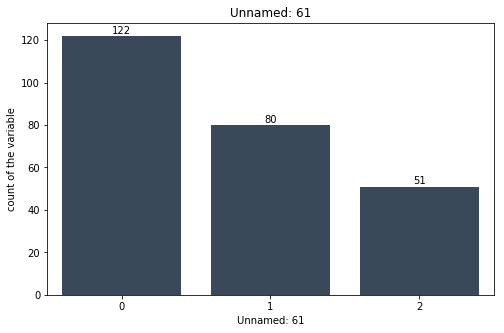

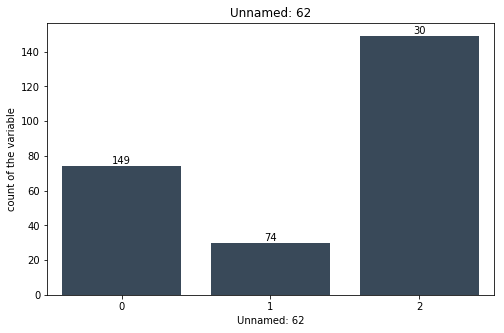

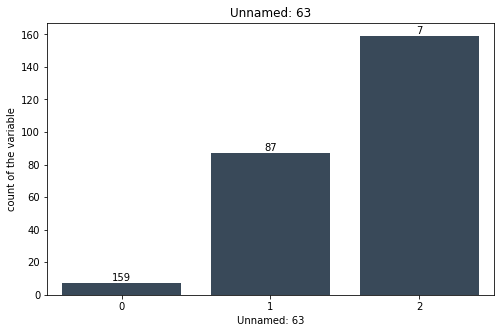

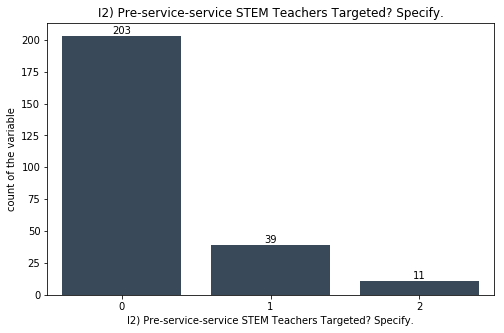

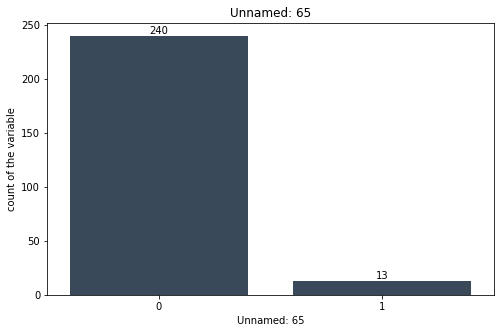

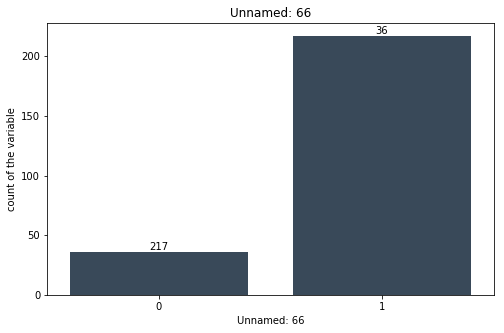

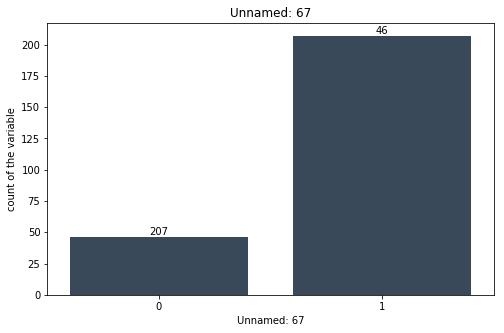

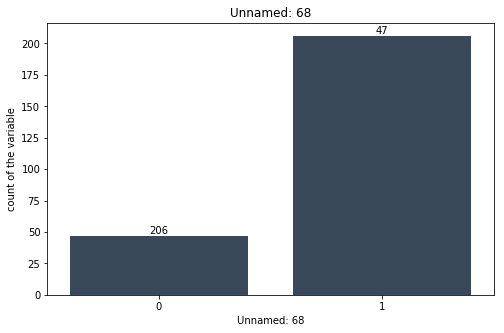

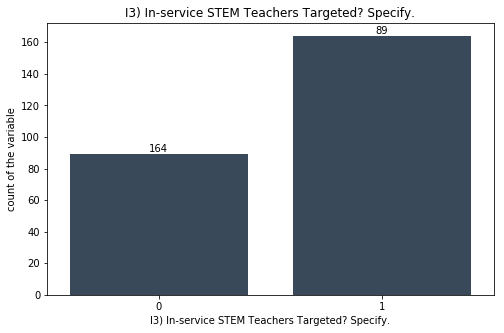

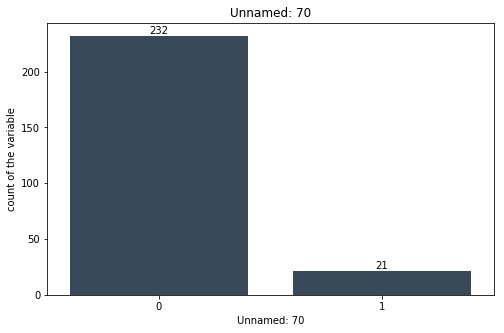

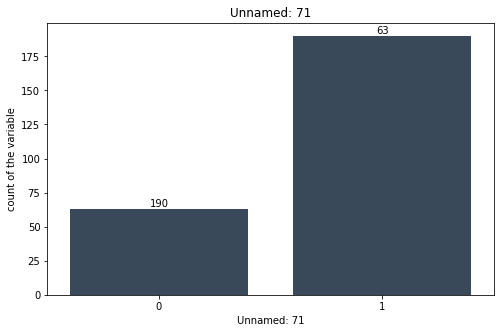

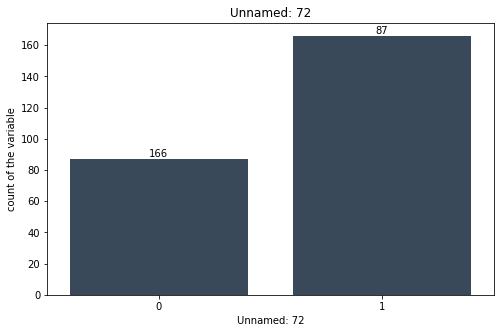

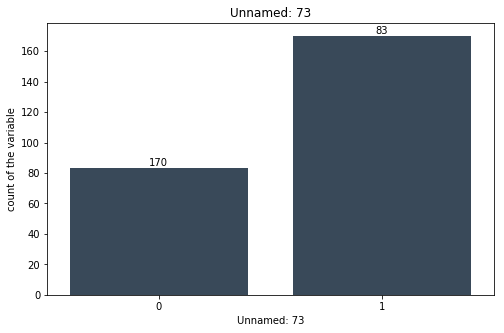

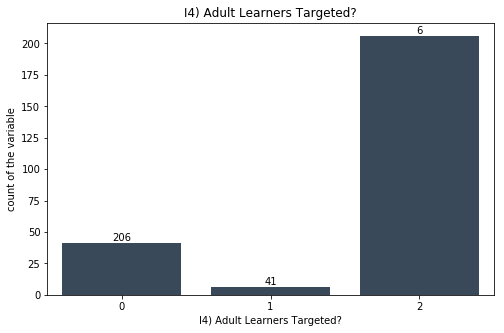

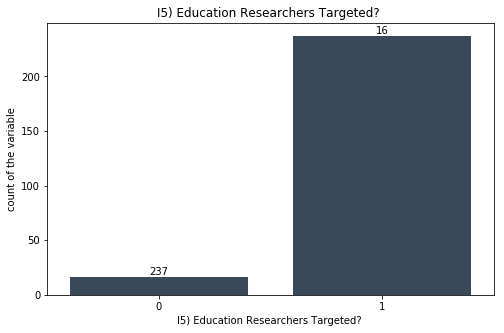

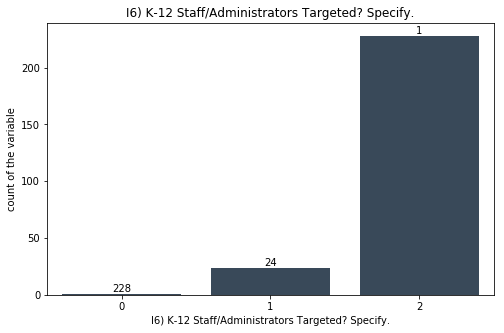

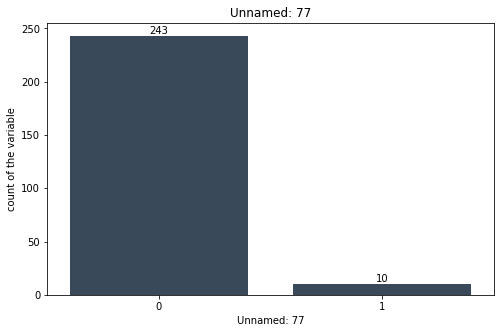

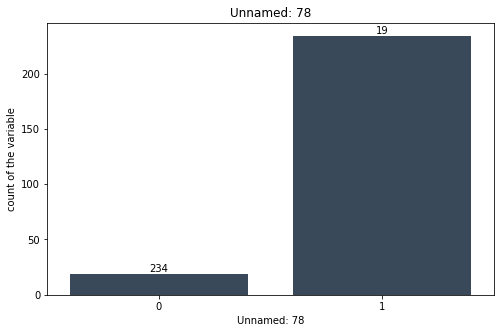

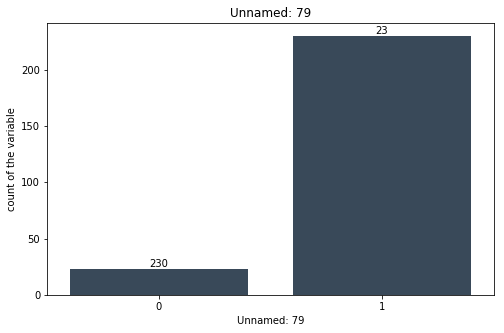

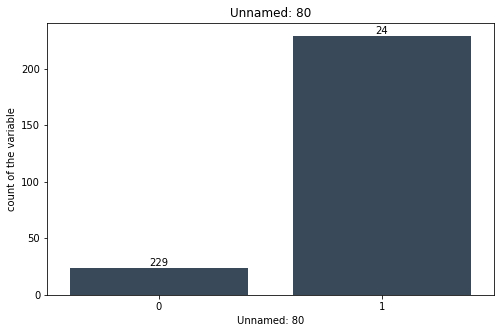

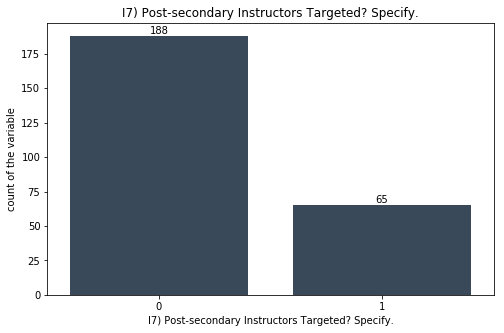

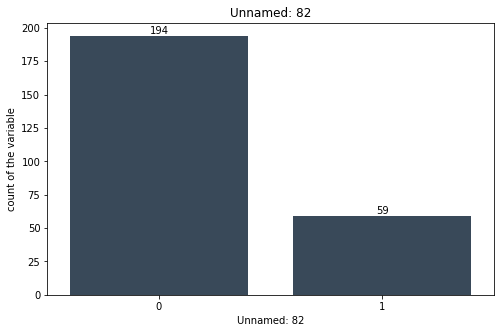

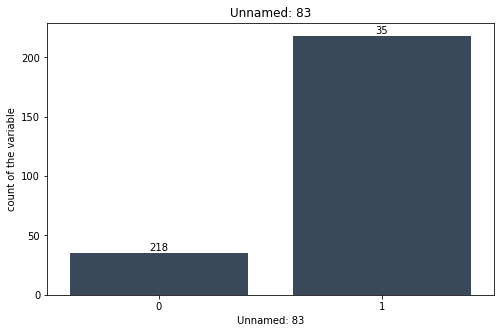

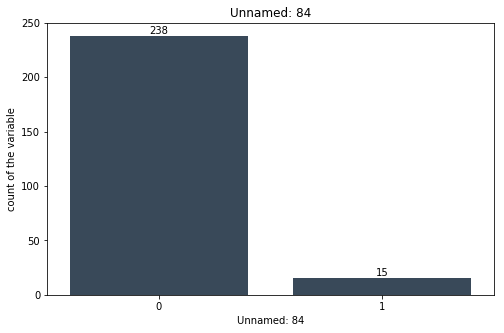

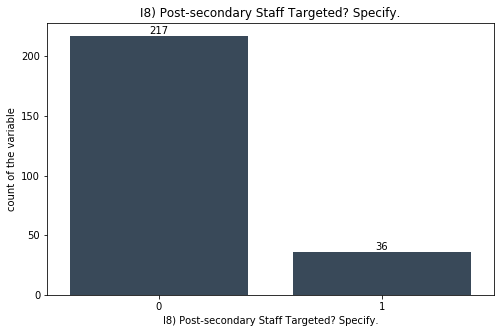

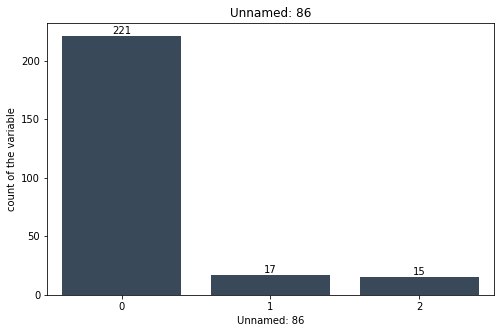

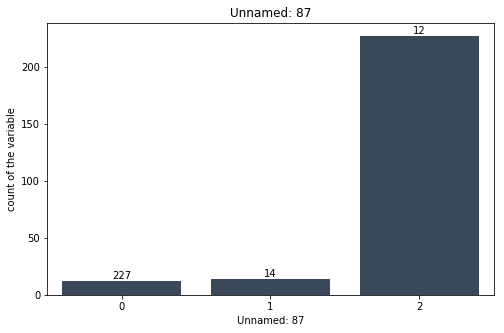

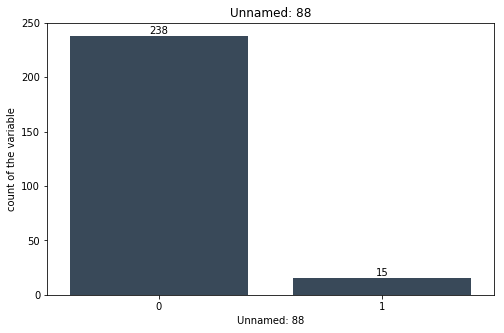

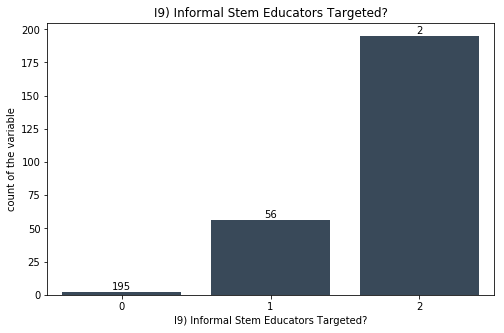

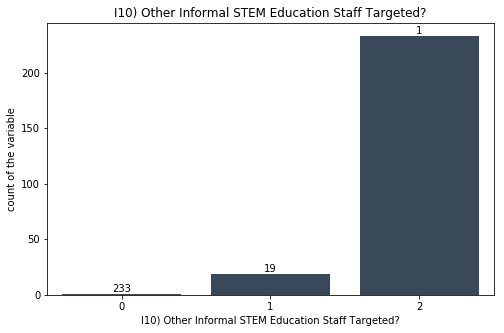

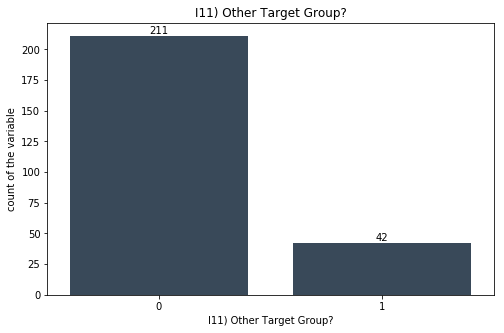

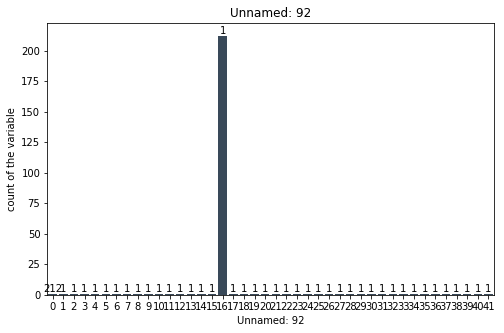

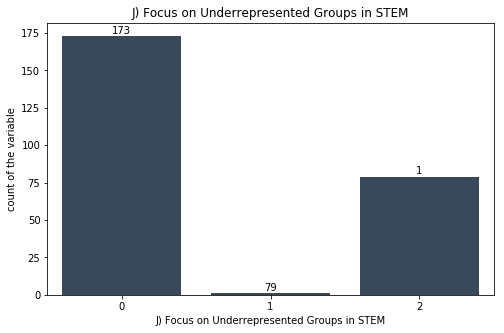

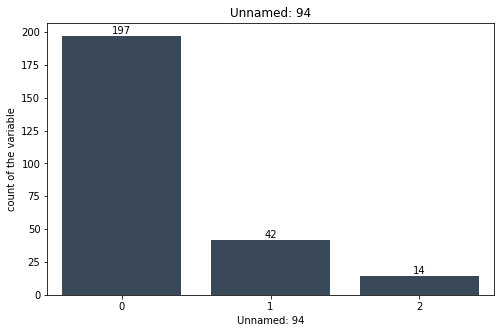

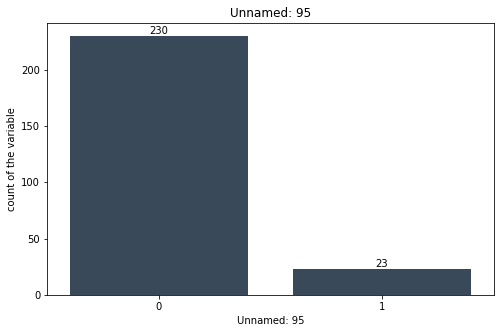

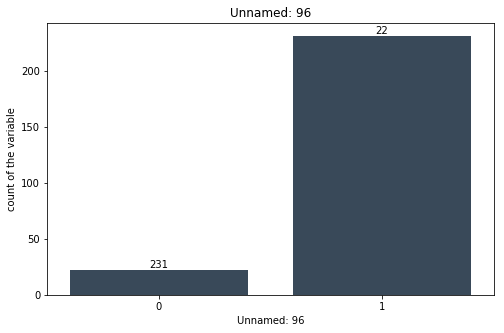

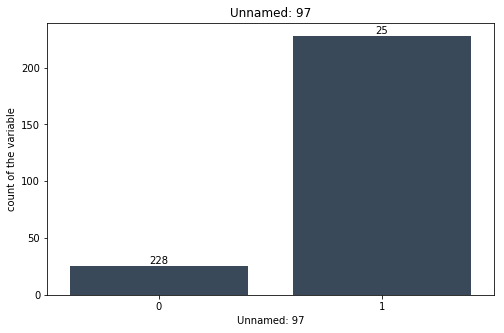

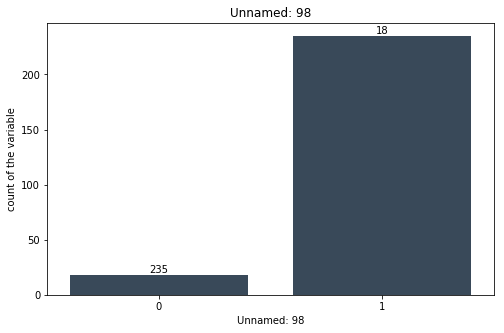

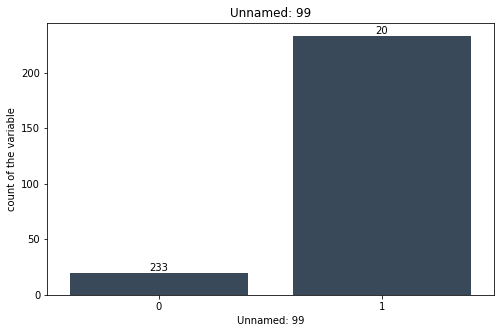

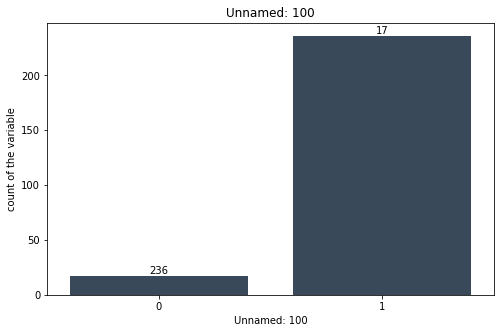

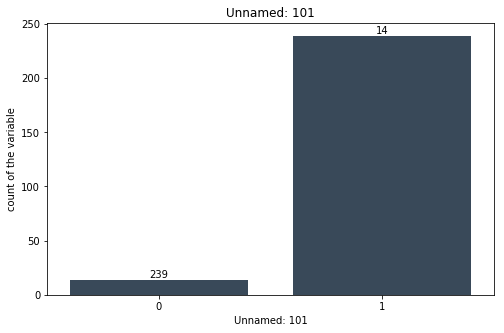

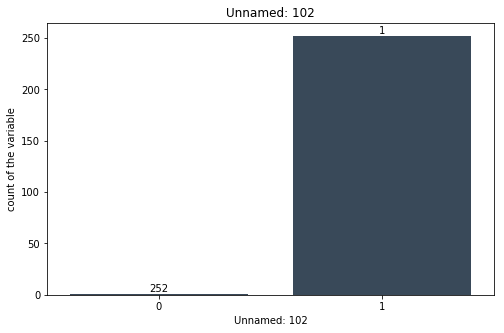

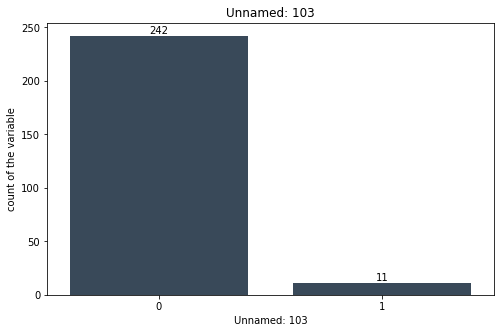

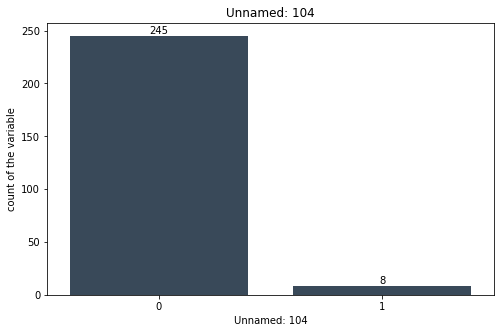

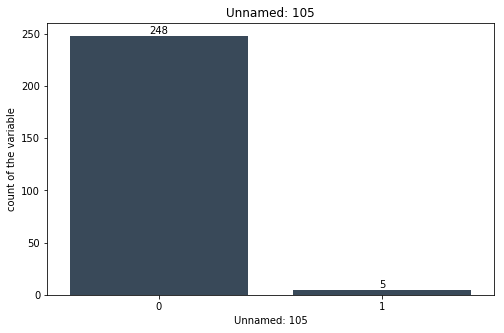

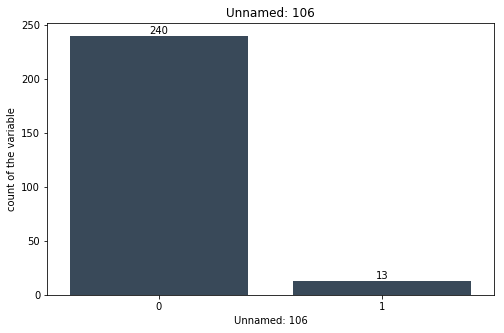

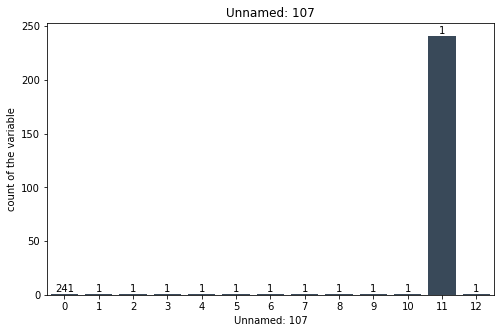

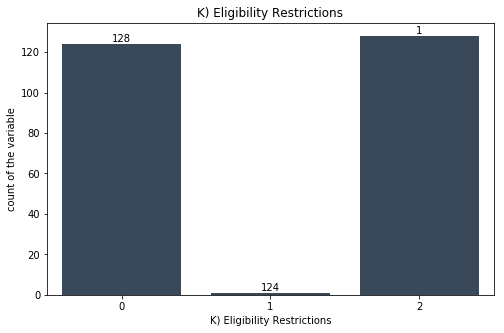

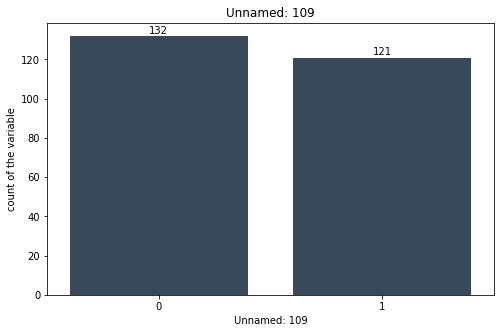

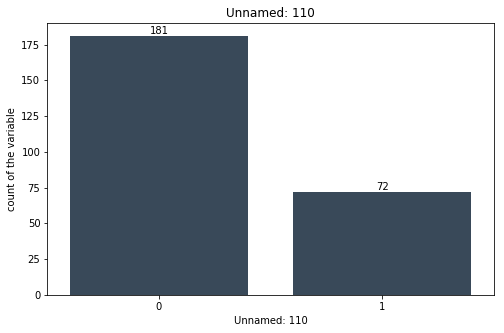

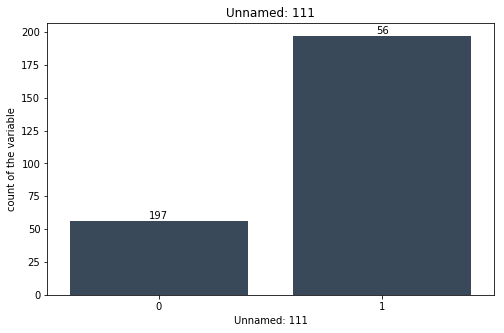

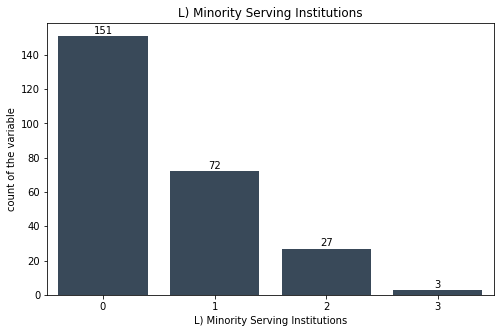

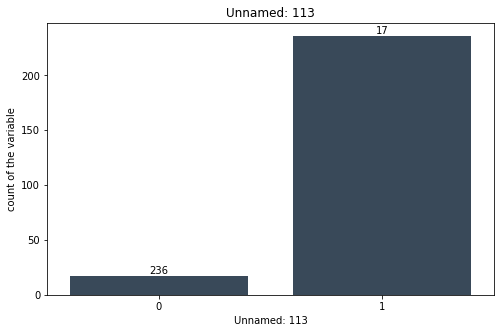

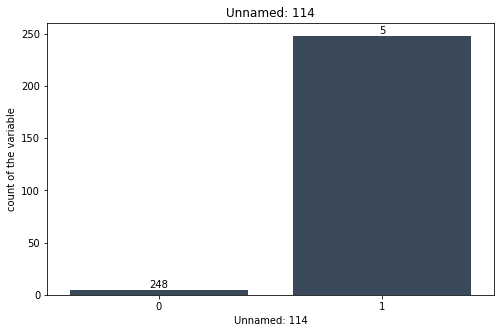

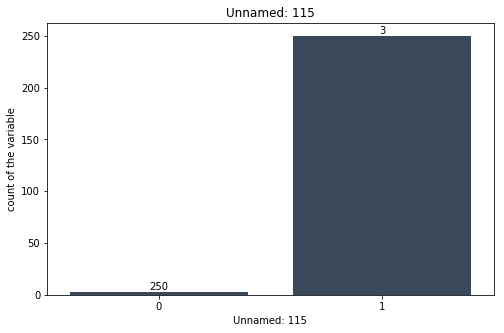

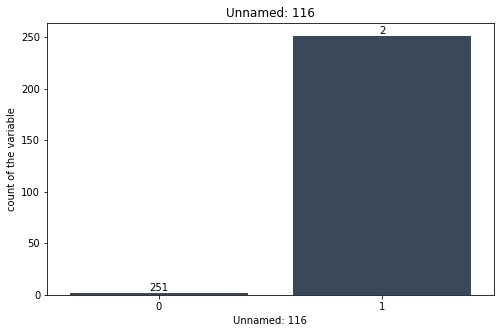

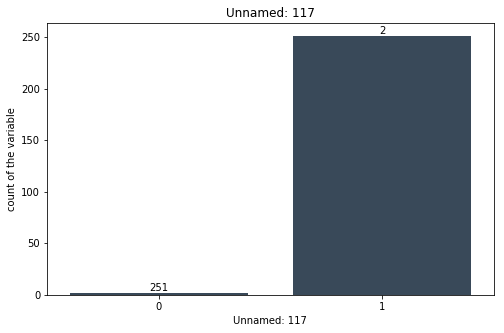

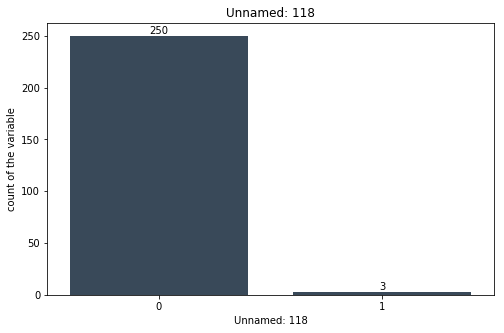

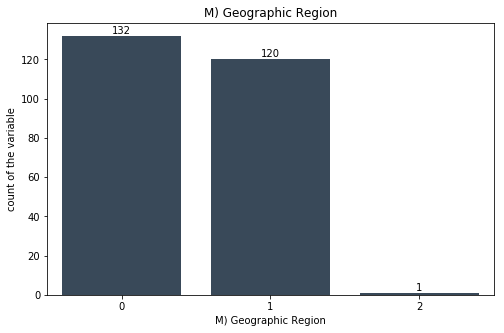

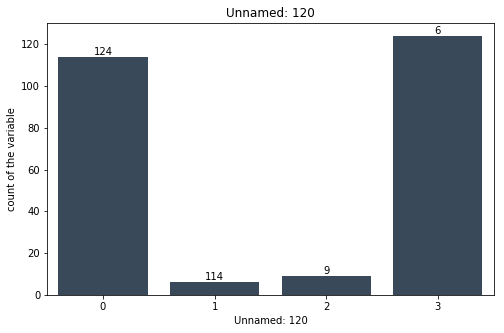

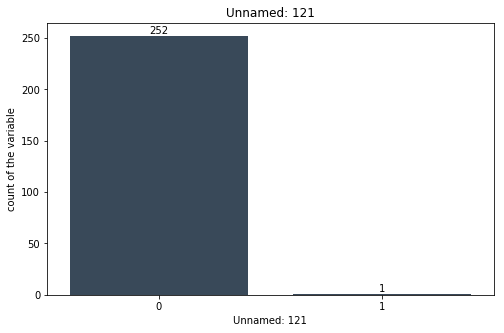

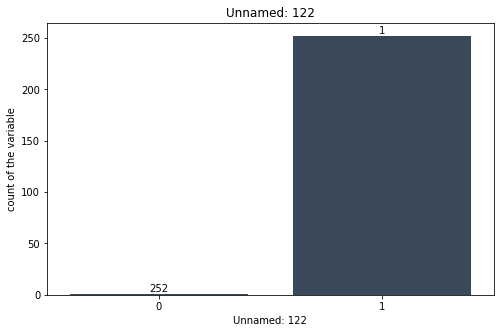

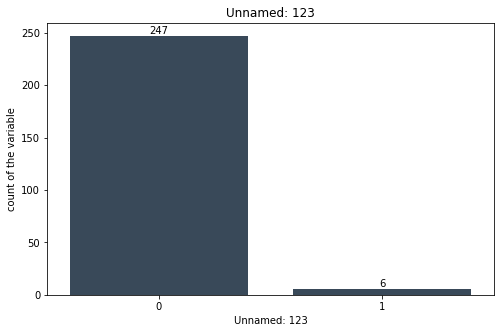

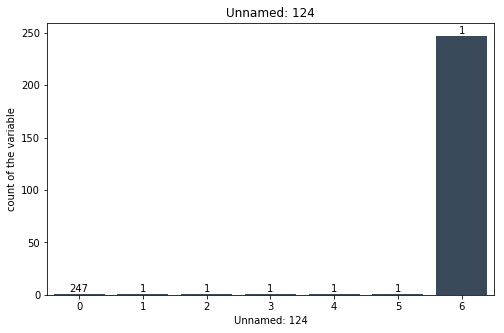

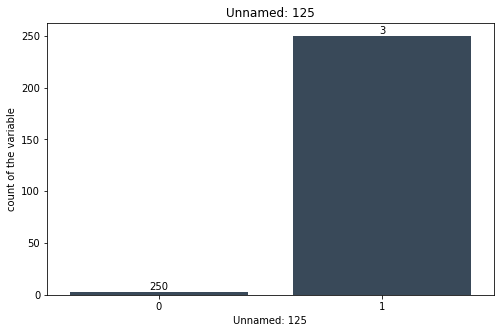

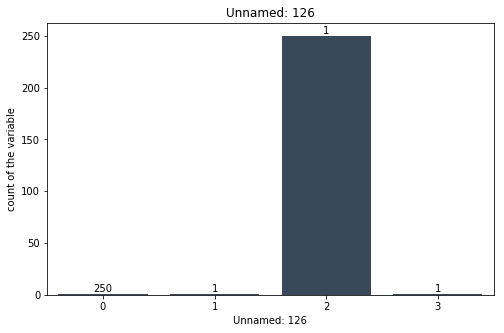

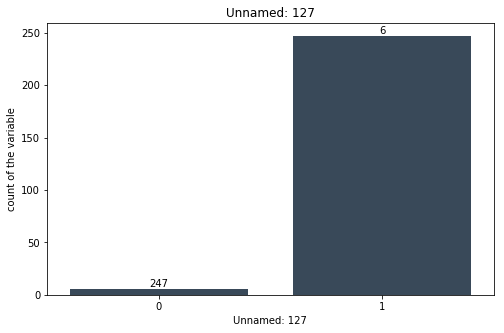

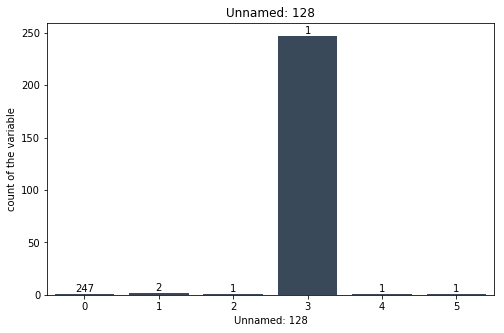

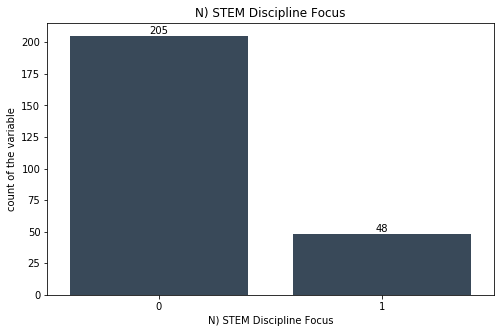

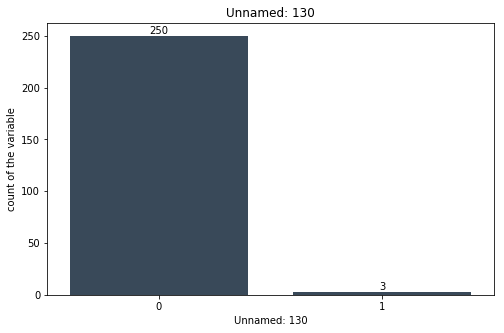

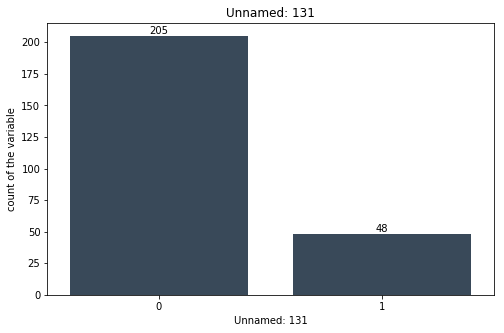

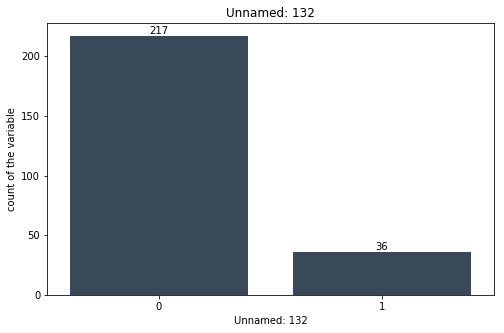

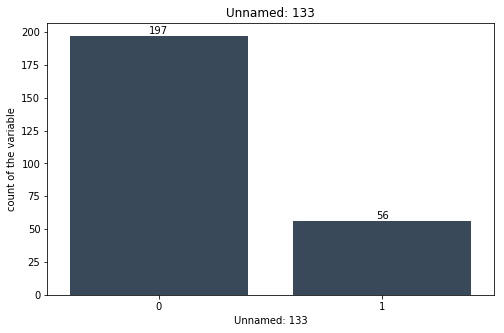

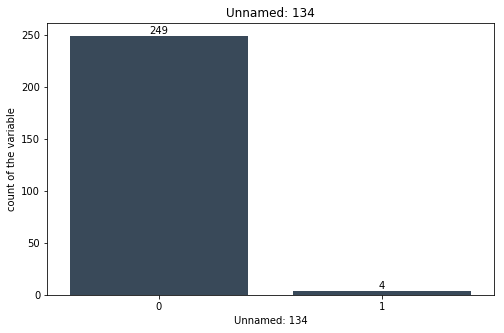

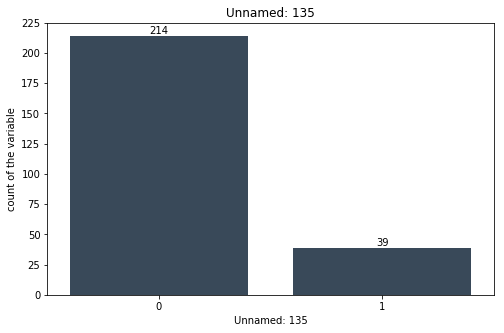

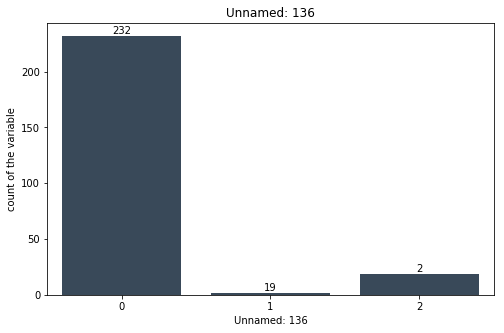

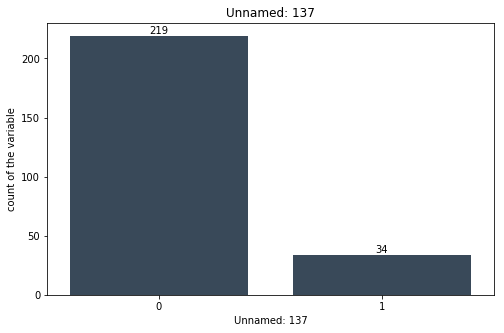

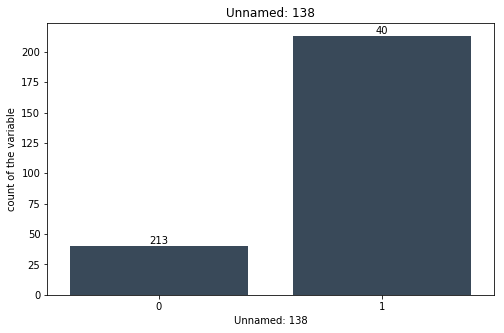

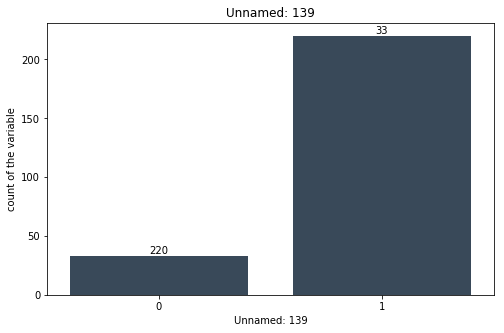

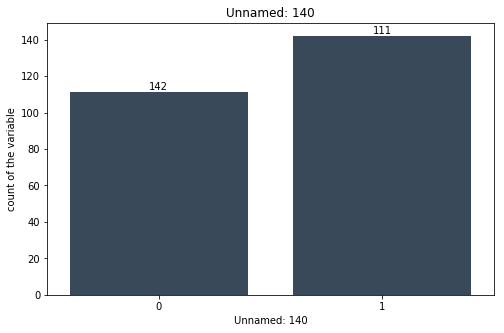

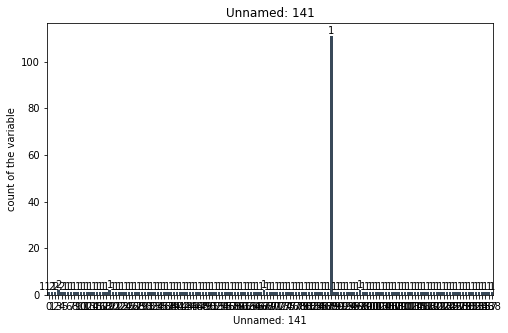

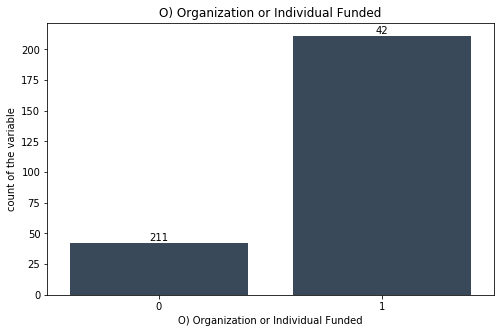

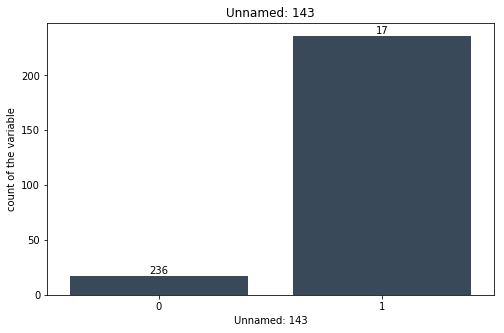

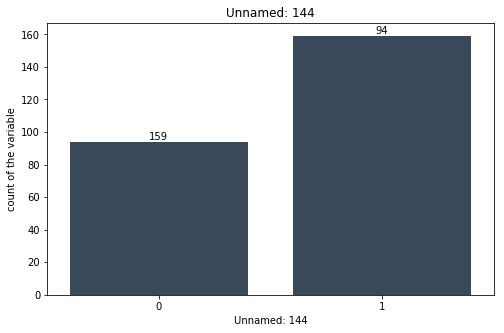

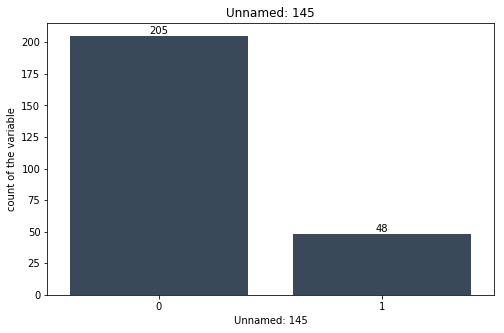

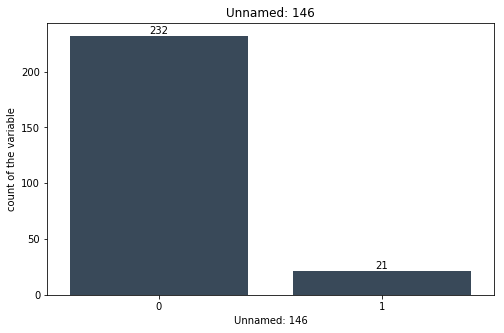

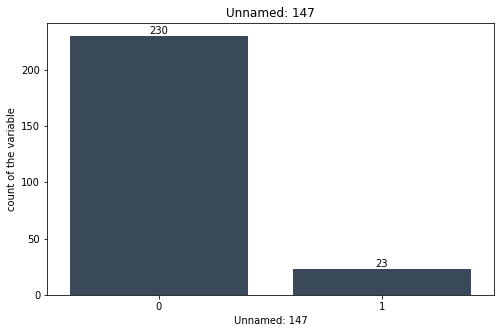

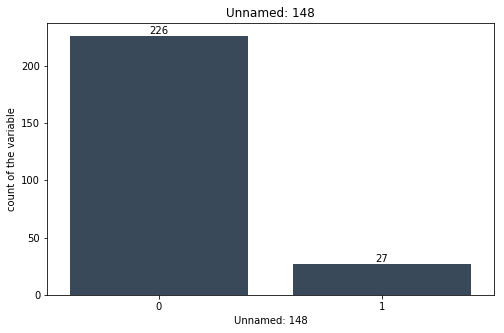

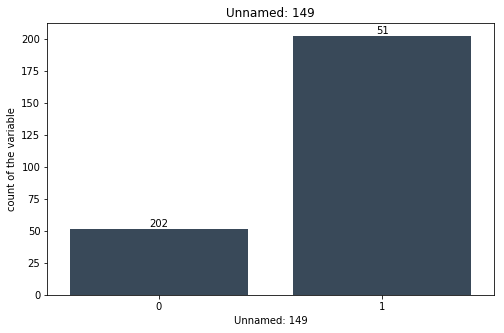

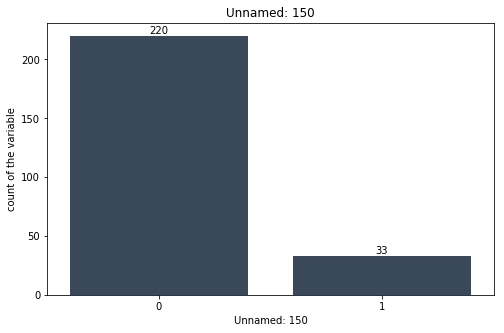

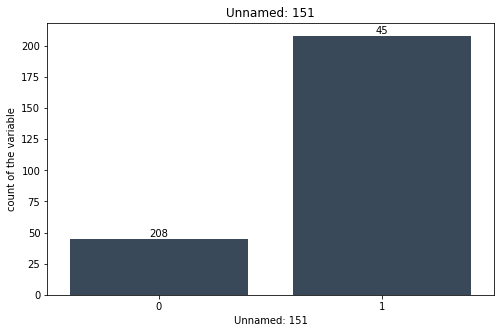

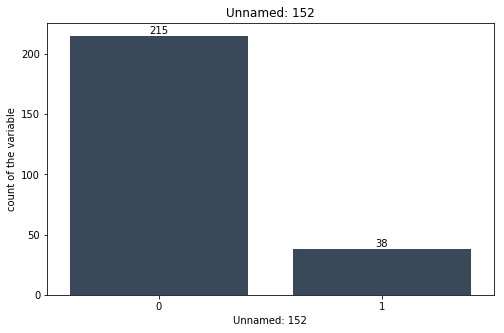

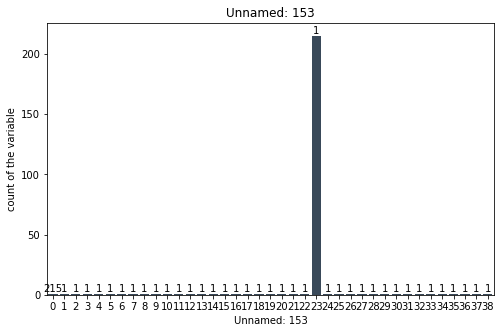

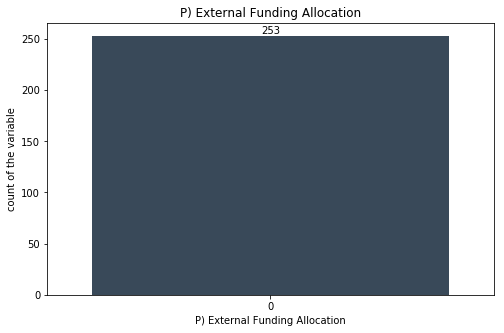

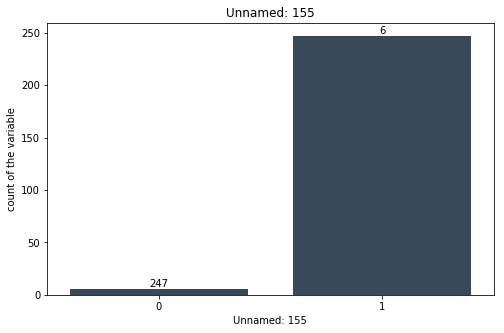

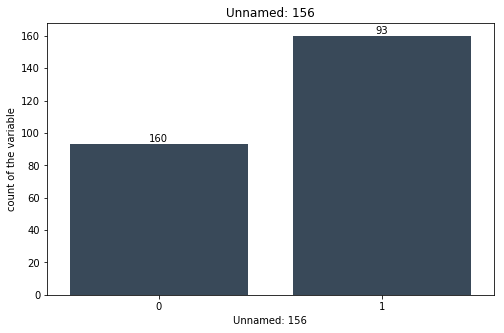

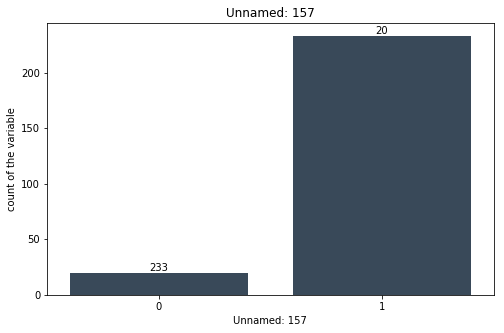

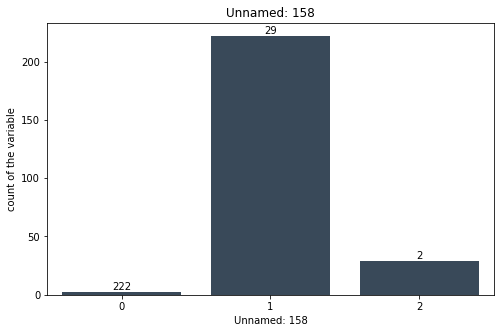

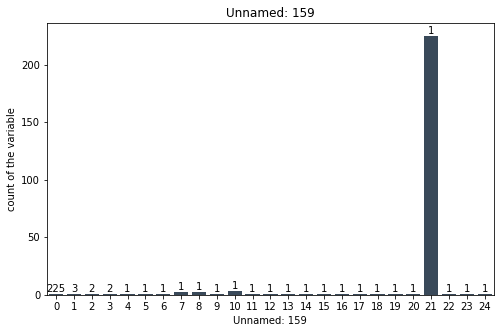

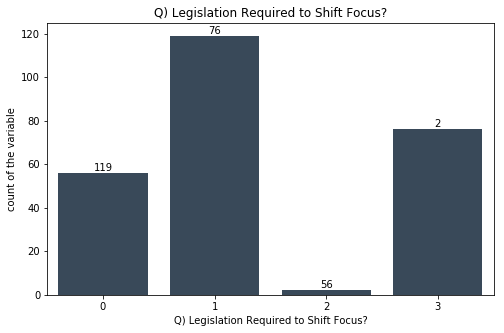

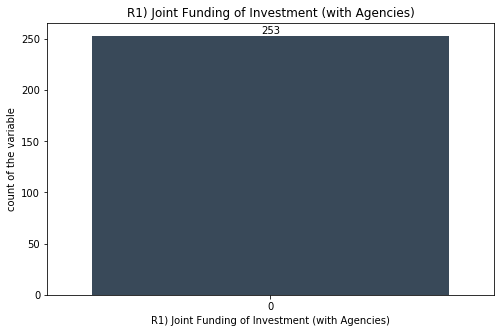

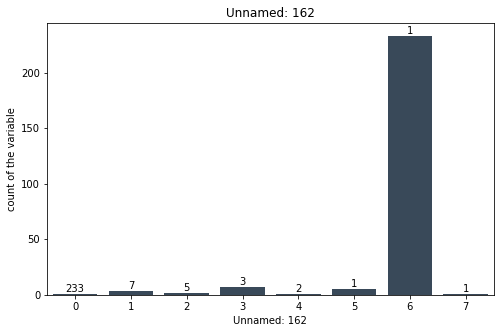

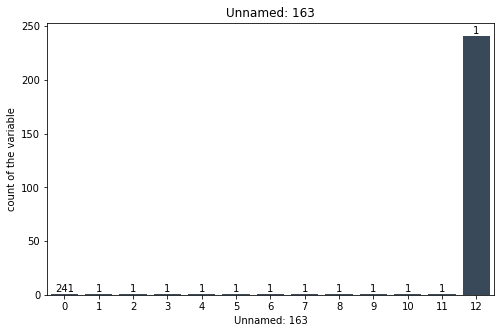

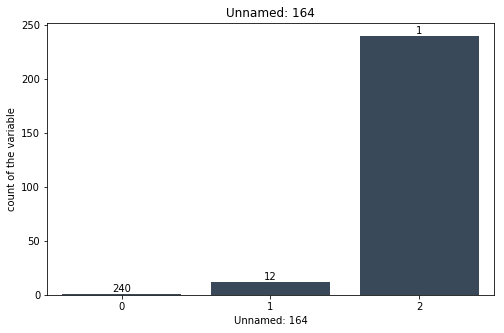

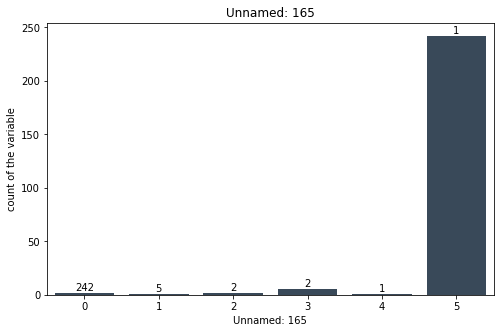

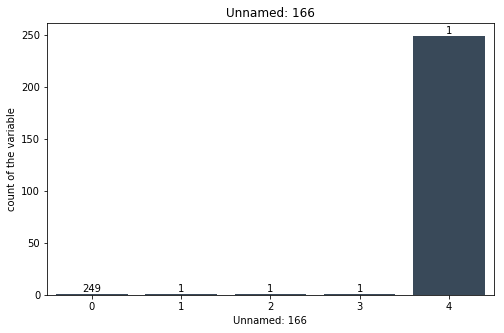

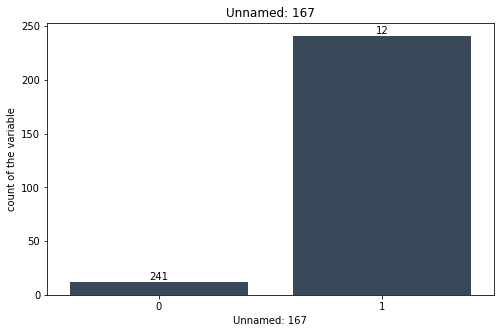

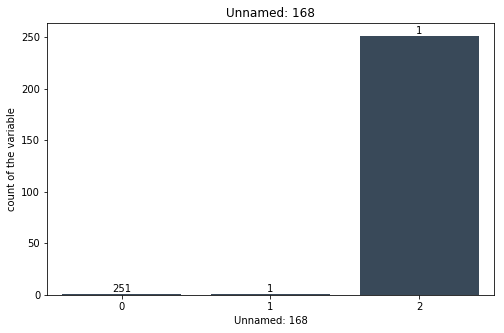

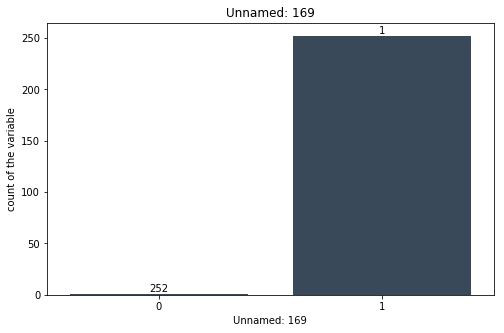

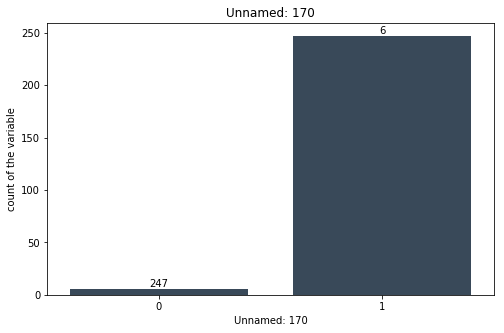

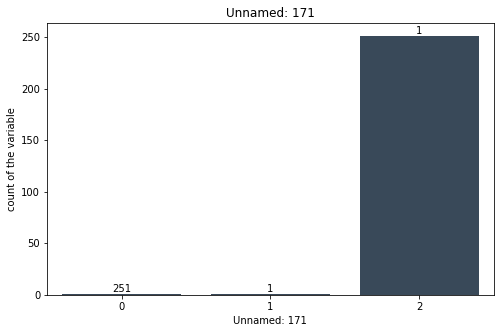

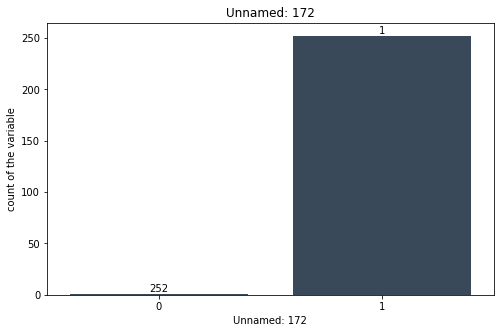

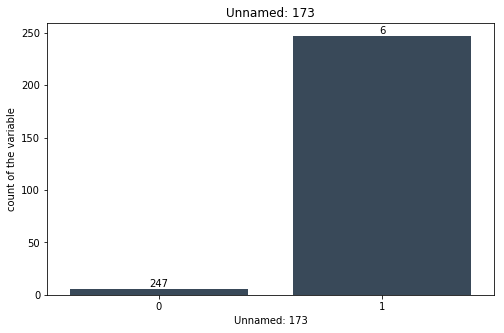

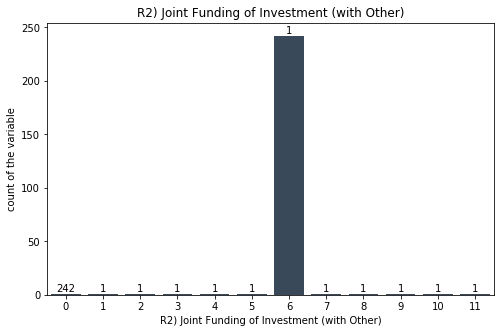

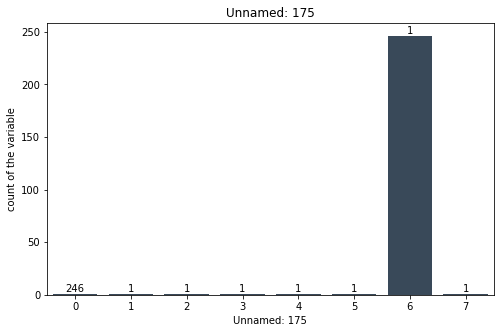

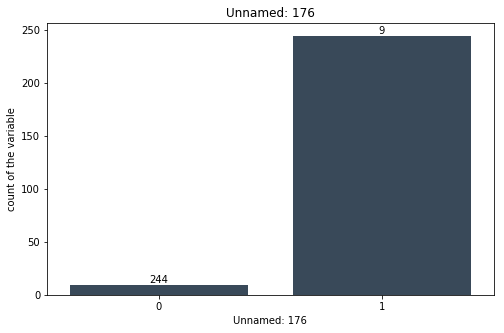

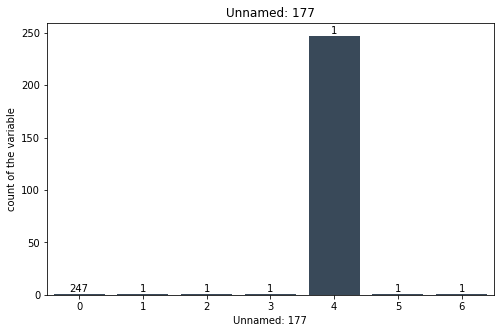

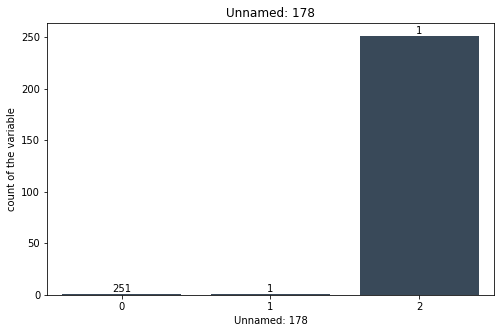

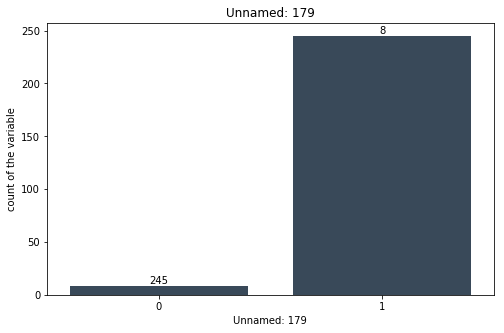

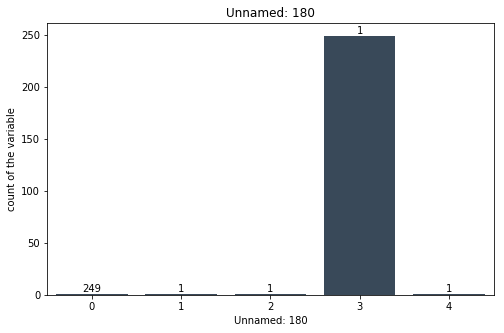

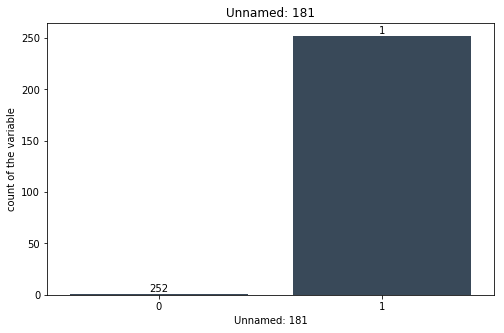

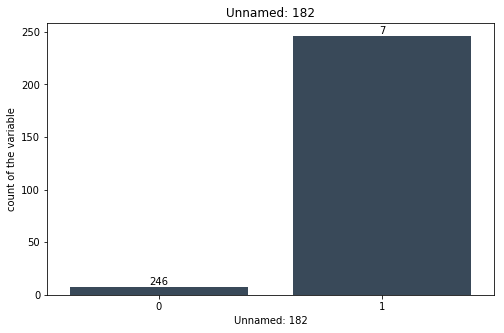

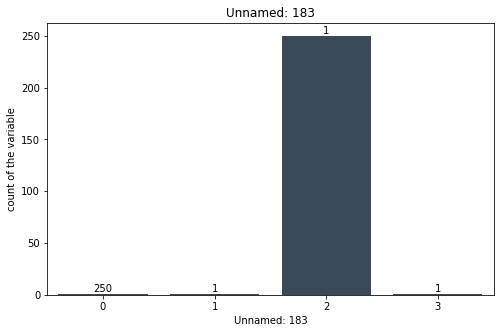

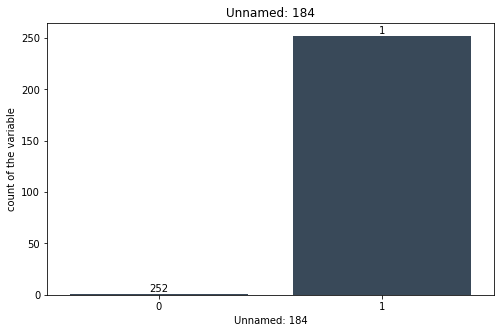

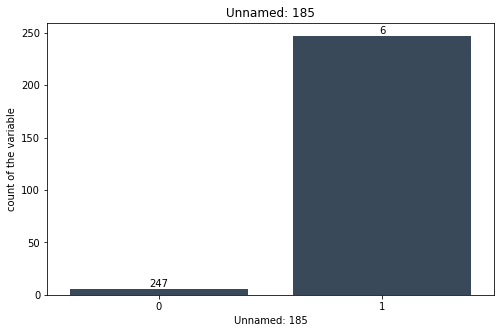

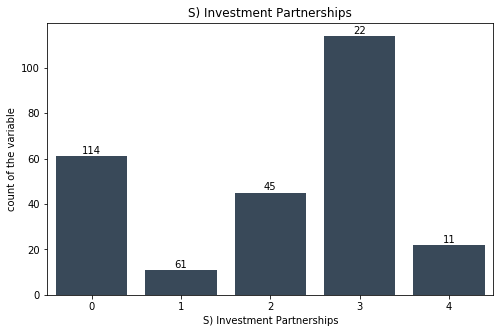

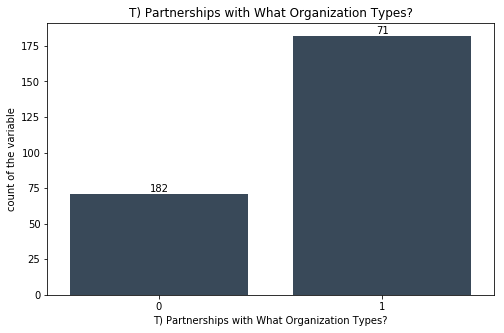

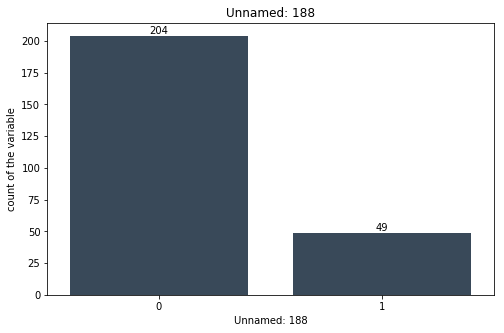

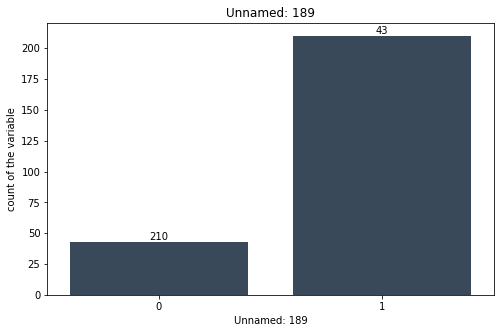

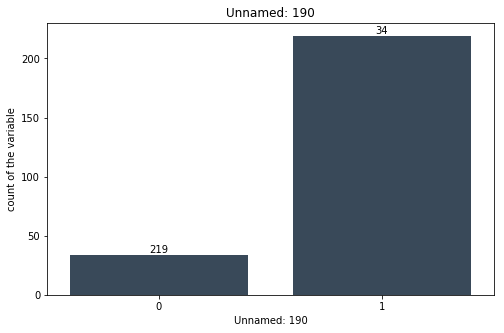

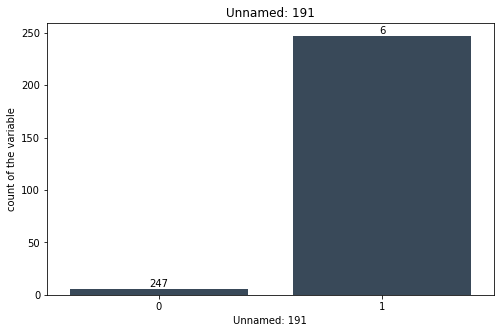

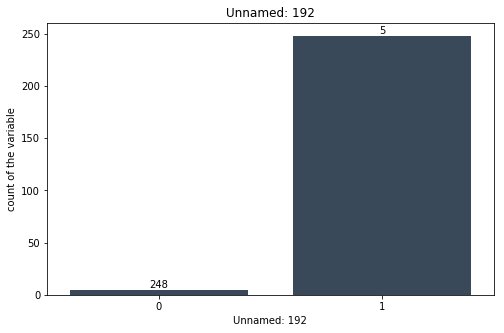

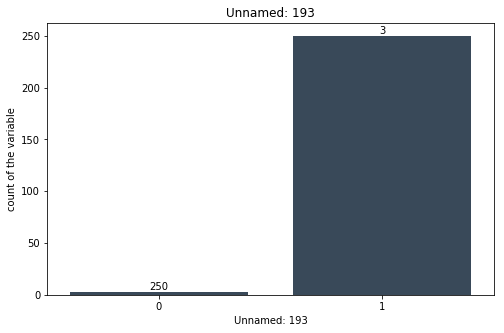

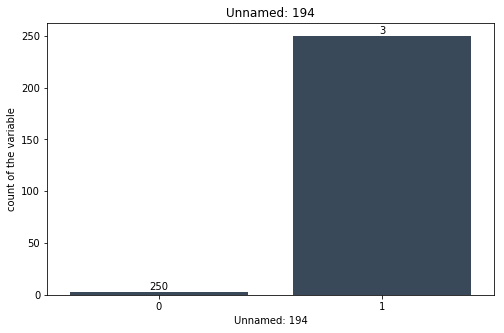

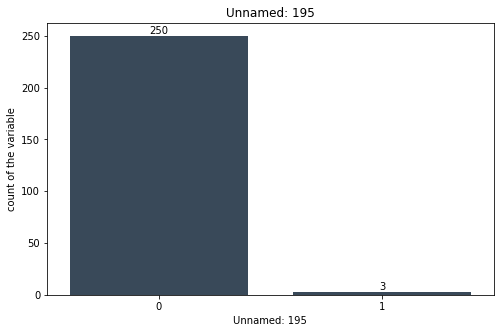

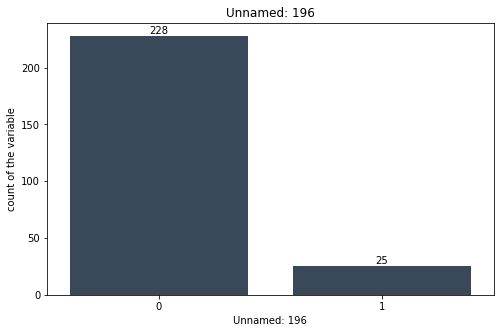

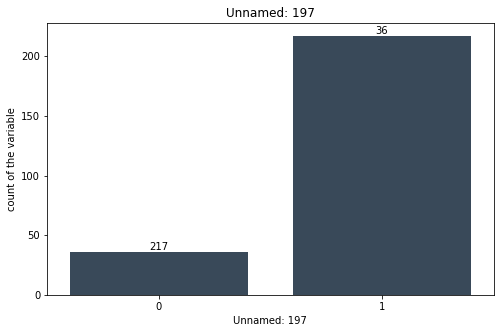

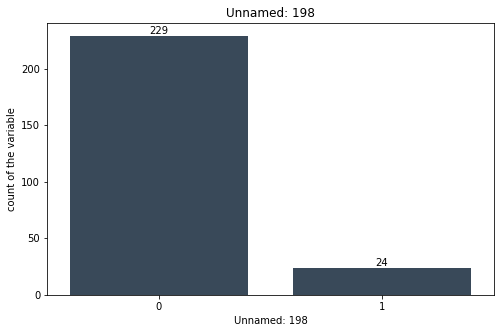

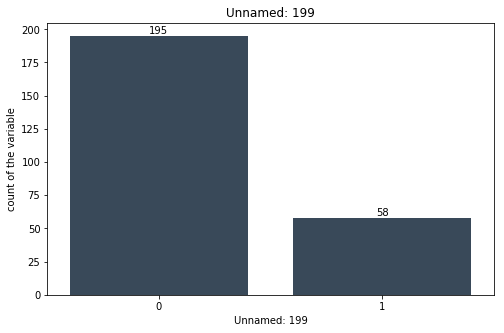

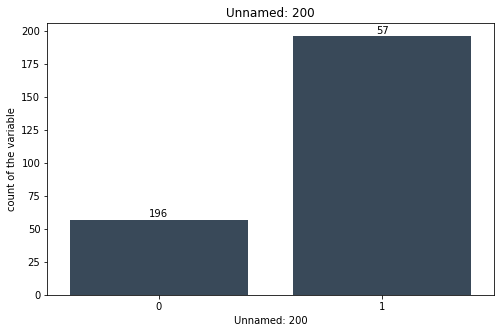

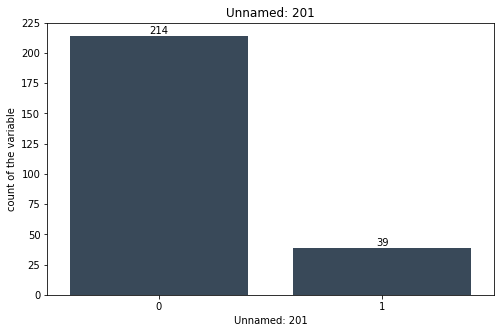

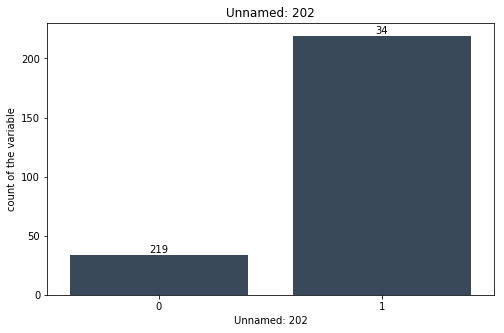

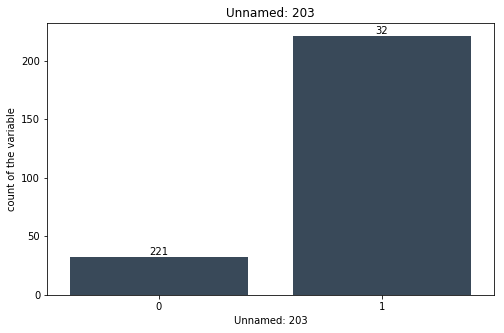

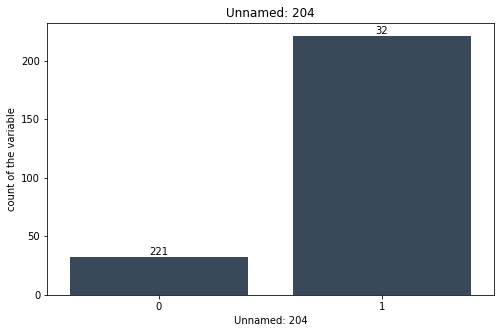

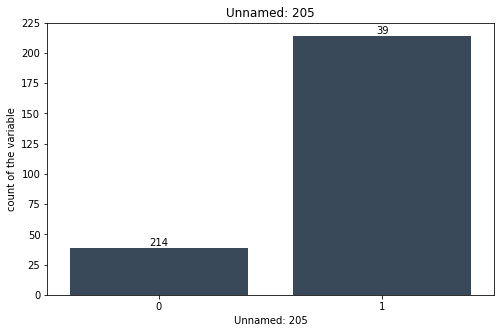

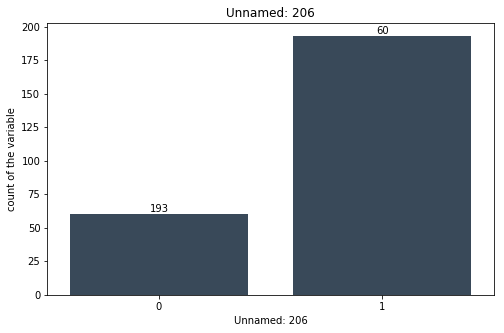

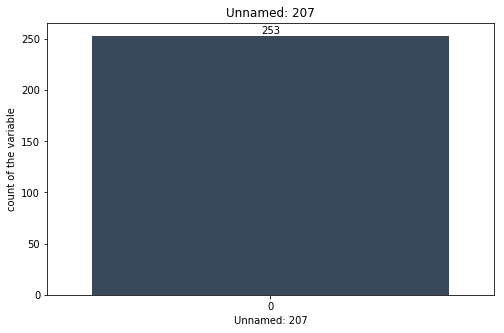

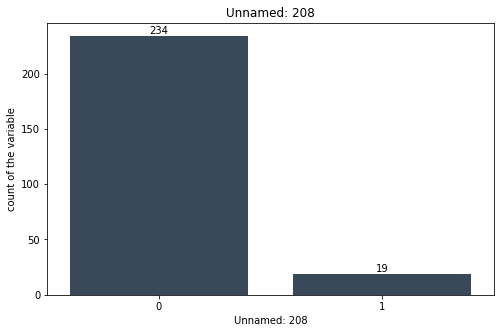

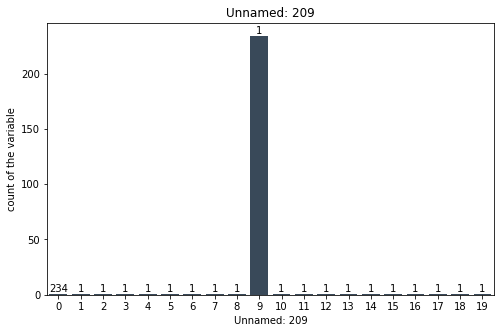

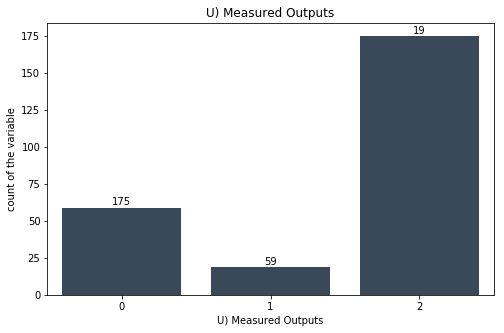

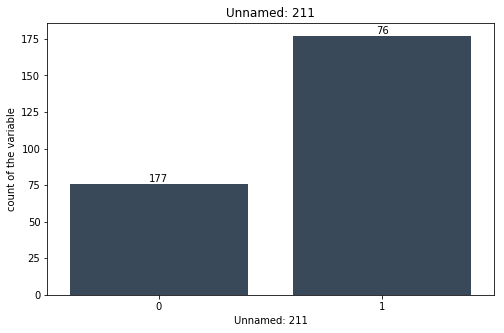

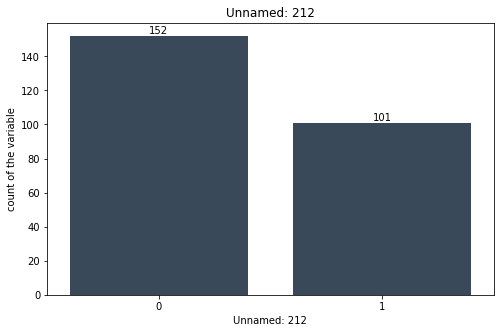

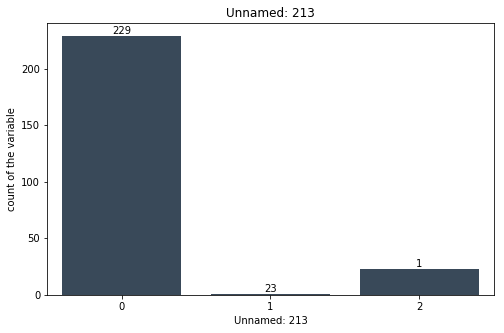

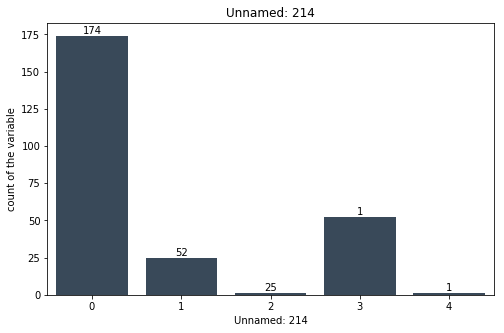

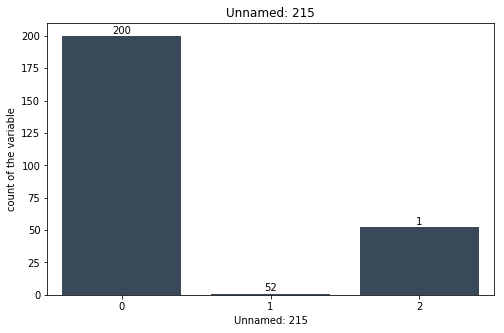

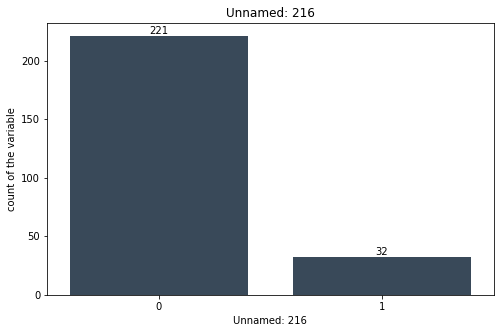

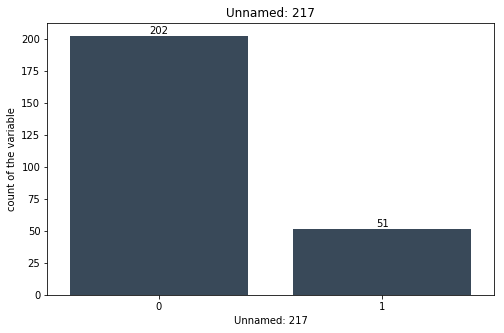

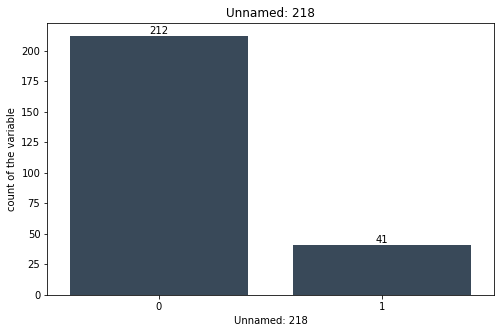

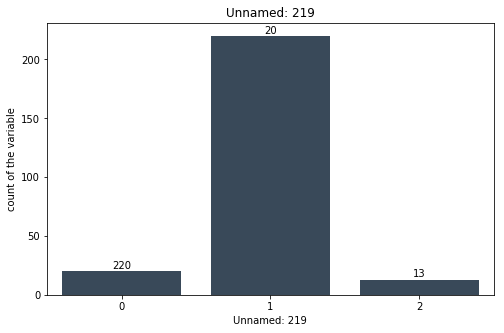

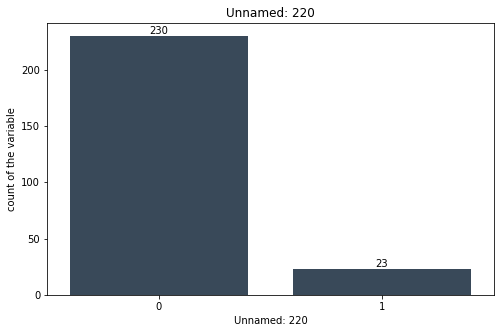

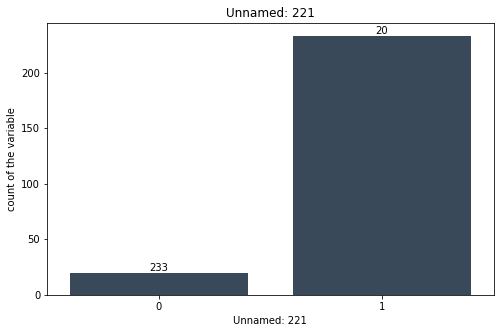

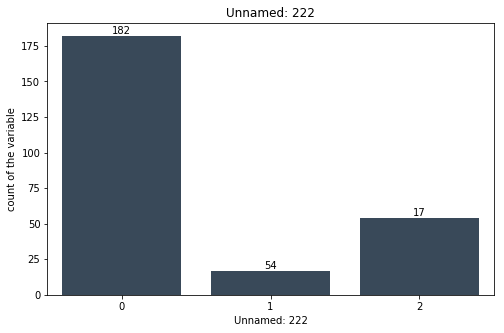

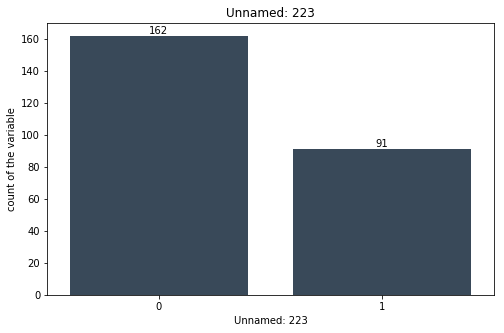

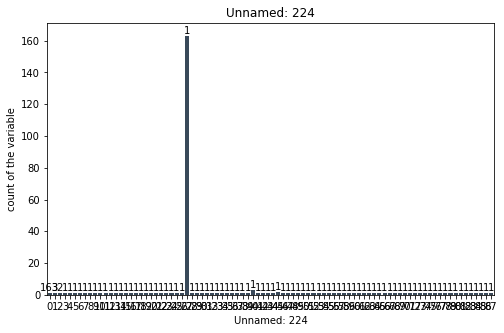

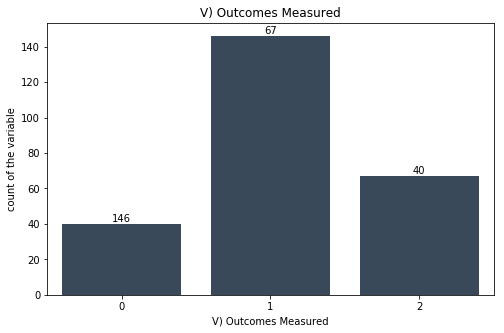

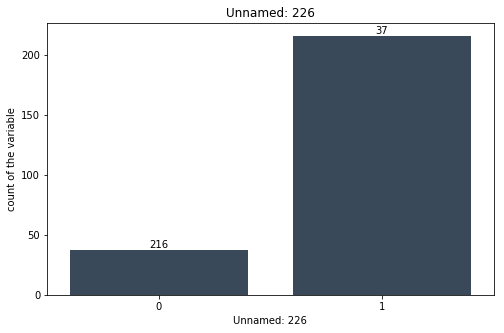

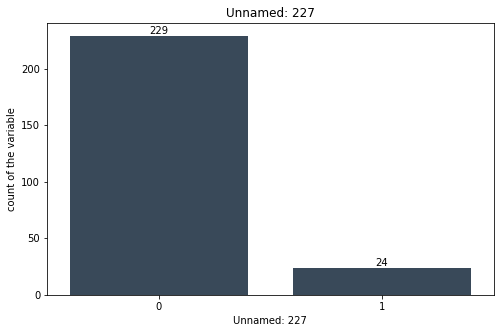

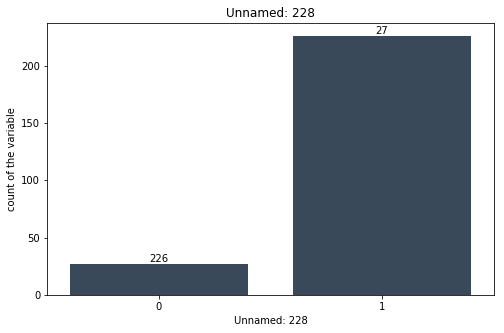

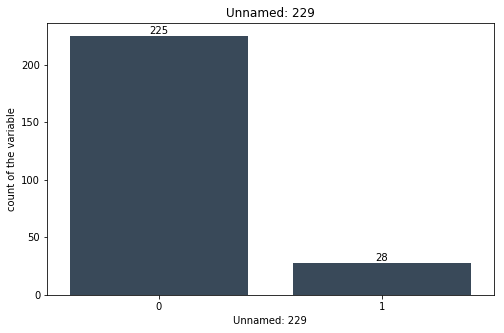

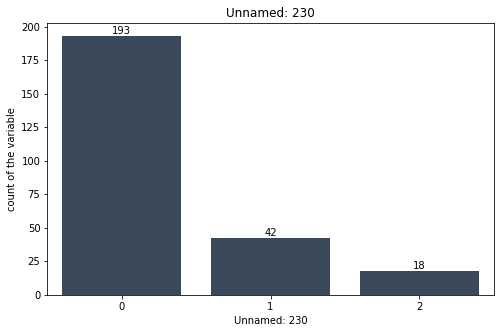

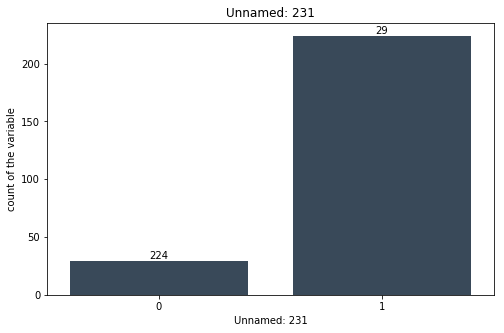

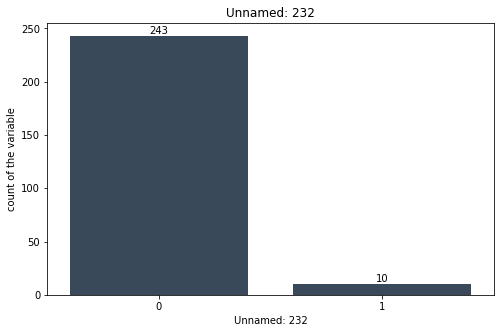

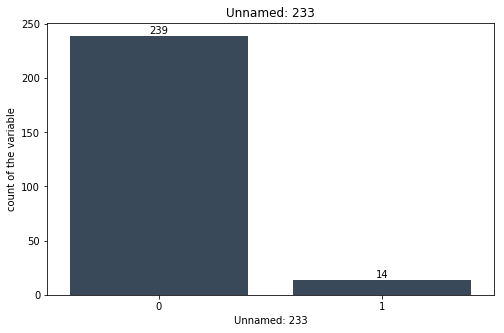

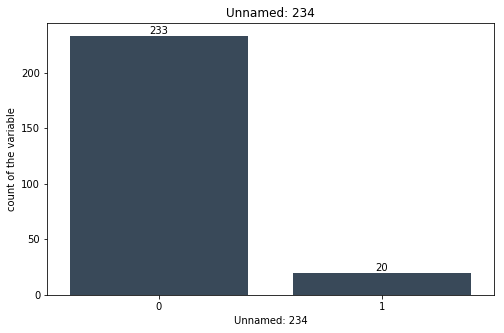

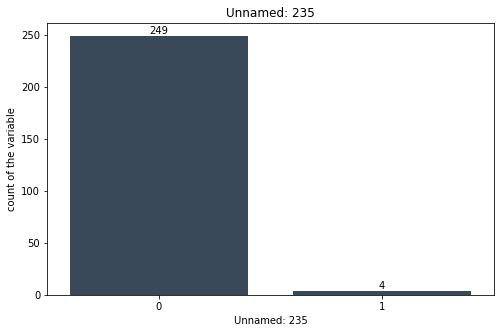

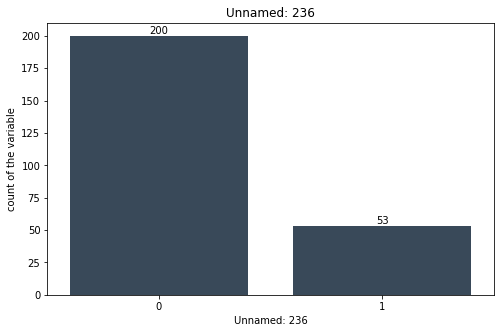

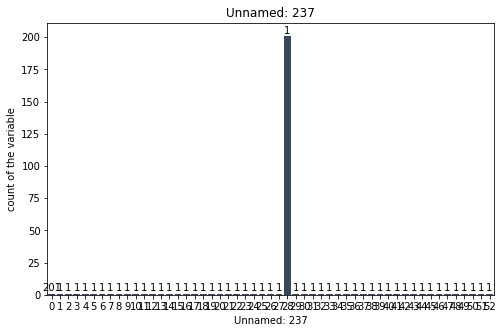

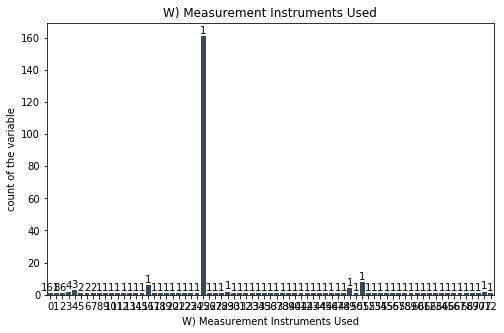

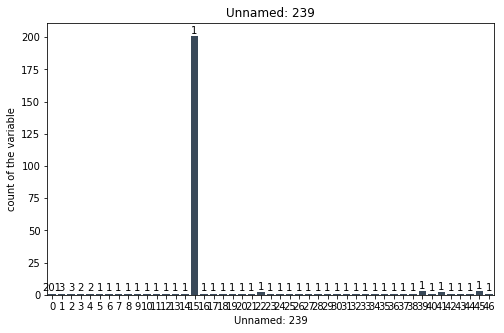

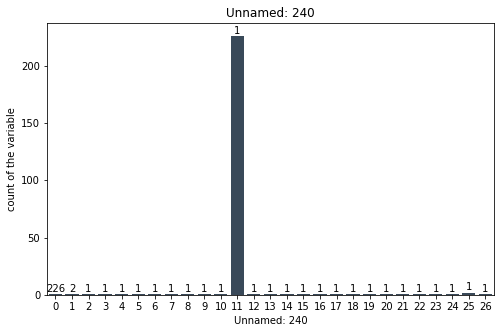

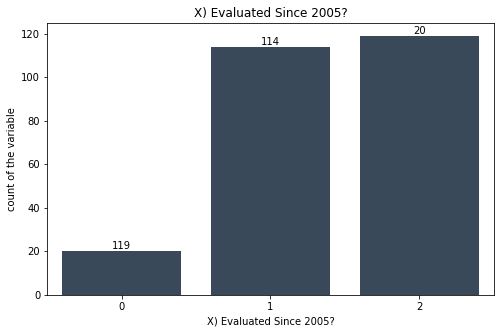

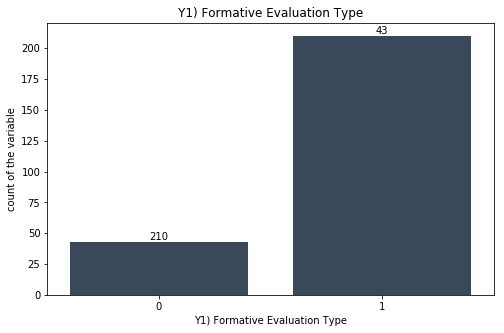

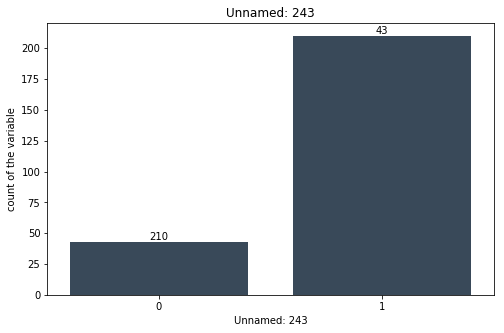

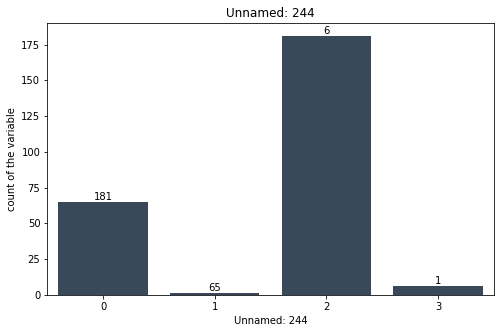

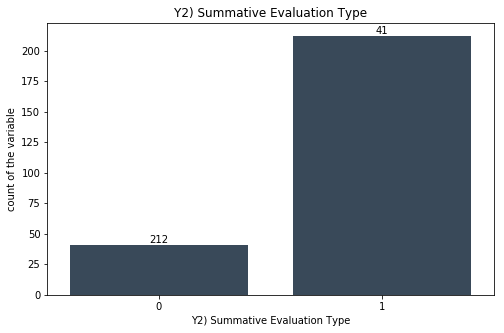

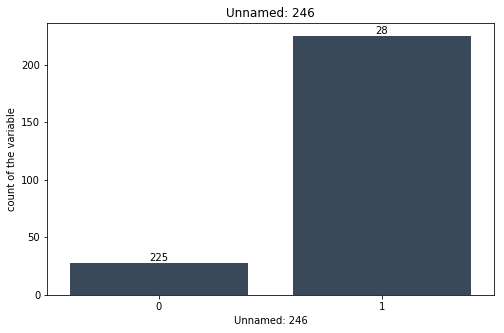

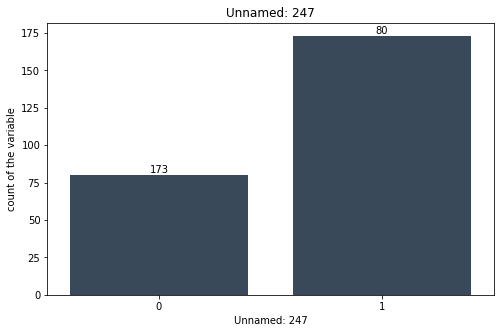

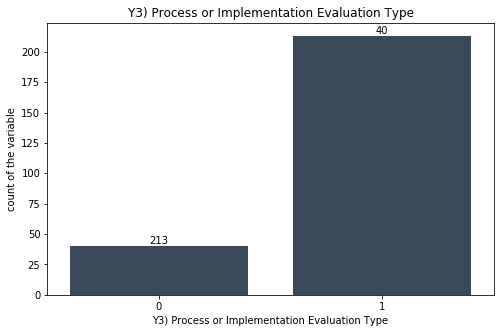

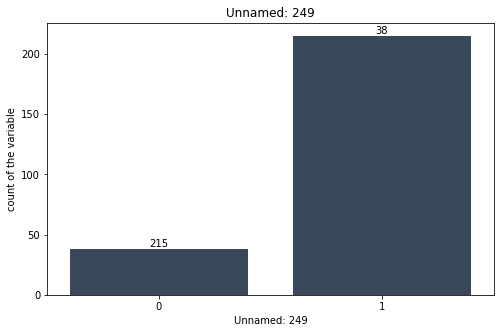

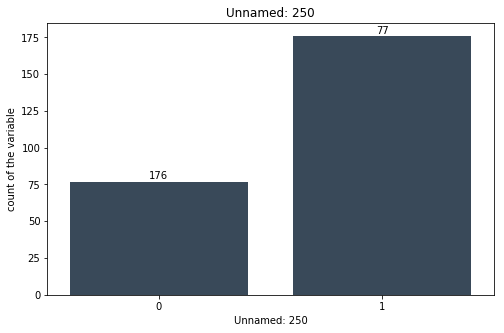

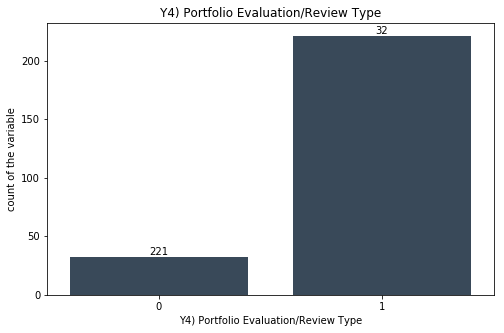

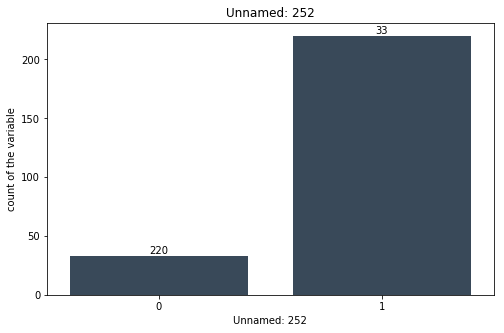

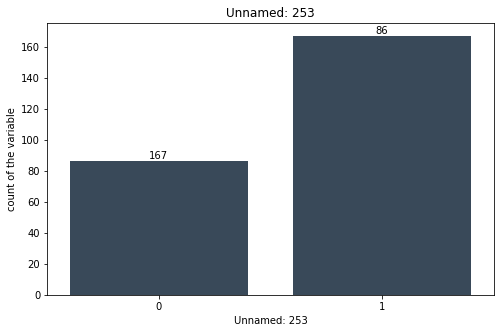

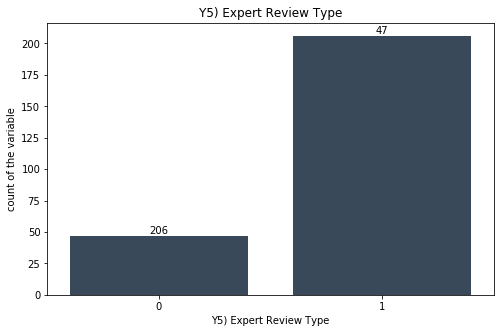

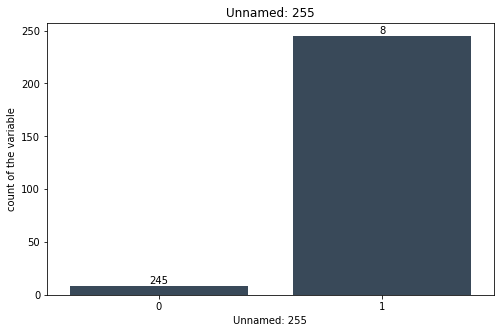

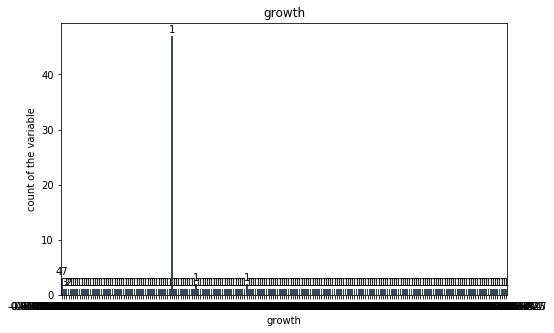

In [127]:
univariate(d=data.iloc[:,13:])

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
data.columns

Index(['Investment Name', 'Agency', 'Subagency', 'A) Brief Description',
       'B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009',
       'C3) Funding FY2010', 'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       ...
       'Unnamed: 247', 'Y3) Process or Implementation Evaluation Type',
       'Unnamed: 249', 'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type',
       'Unnamed: 252', 'Unnamed: 253', 'Y5) Expert Review Type',
       'Unnamed: 255', 'growth'],
      dtype='object', length=256)

In [32]:
data_non =  [col for col in data.columns if col not in ['C1) Funding FY2008', 'C2) Funding FY2009',
       'C3) Funding FY2010','growth']]

In [33]:
mutual_info_score1 = []
for i in data_non:
    mutual_info_score1.append(mutual_info_score(data['growth'],data[i]))

In [34]:
mutual_info_score2 = pd.DataFrame({'names':data_non,'score':mutual_info_score1})

In [35]:
mutual_info_score2.sort_values(by='score',ascending=False)

,names,score
3,A) Brief Description,6.693280e-01
0,Investment Name,6.638485e-01
137,Unnamed: 141,3.582687e-01
220,Unnamed: 224,2.344777e-01
2,Subagency,2.211372e-01
234,W) Measurement Instruments Used,1.814679e-01
233,Unnamed: 237,1.465939e-01
4,B) Year Established,1.339713e-01
235,Unnamed: 239,1.181513e-01
149,Unnamed: 153,1.044277e-01


In [36]:
mutual_info_score2[mutual_info_score2['score'] > 0.05]

,names,score
0,Investment Name,0.663849
1,Agency,0.064130
2,Subagency,0.221137
3,A) Brief Description,0.669328
4,B) Year Established,0.133971
17,Unnamed: 21,0.086016
51,Unnamed: 55,0.088738
88,Unnamed: 92,0.099332
137,Unnamed: 141,0.358269
149,Unnamed: 153,0.104428


In [37]:
co = data[data_non].corr()


In [52]:
co1 = co[(co > 0.9) | (co < -0.9)]

In [56]:
co1.to_csv('C:/Users/amogh/Desktop/col.csv')

In [57]:
data_non =  [col for col in data.columns if col not in ['C1) Funding FY2008', 'C2) Funding FY2009',
       'C3) Funding FY2010','growth','D) Mission-specific or General STEM?','E) Agency or Mission-Related Workforce Needs?','Unnamed: 120']]

In [58]:
# modeling

In [59]:
from sklearn.model_selection import train_test_split

In [116]:

X_train,X_test,Y_train,Y_test = train_test_split(data[data_non],data['growth'],train_size=0.7,test_size=0.3,random_state=123)

In [117]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_jobs=-1)

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid2 = {"n_estimators": [100,150,200,300,400,500,600],
                #'max_depth':range(3,10,2),
                #'min_child_weight':[3,4,5,6,7,8,9,10],
                #'gamma':[i/10.0 for i in range(0,5)],
                #'subsample':[i/10.0 for i in range(6,10)],
                 #'colsample_bytree':[i/10.0 for i in range(6,10)],
               # 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
                #'learning_rate' :[0.01,0.05,0.1,0.15]
                   # 'colsample_bylevel':[0.5,0.8,1]
                

              }

In [120]:
grid_search = GridSearchCV(xg, param_grid=param_grid2,cv=3)
best_model= grid_search.fit(X_train,Y_train)

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [121]:
best_model.best_params_

{'n_estimators': 150}

In [122]:
xg = XGBClassifier(n_jobs=-1,n_estimators=150)

In [123]:
xg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [124]:
y_pred = xg.predict(X_test)

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [125]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [126]:
from sklearn.metrics import roc_auc_score

In [127]:
roc_auc_score(Y_test,y_pred)

0.6541218637992832

In [128]:
importance= xg.feature_importances_
importance = pd.DataFrame({'importance':importance,'feature':data_non})
importance = importance.sort_values(by ='importance',ascending=False)

#sns.barplot(importance['importance'],importance['feature'],color='brown')

In [129]:
importance

,feature,importance
0,Investment Name,0.104252
4,B) Year Established,0.093278
3,A) Brief Description,0.069959
134,Unnamed: 141,0.057613
12,Unnamed: 18,0.037037
244,Y4) Portfolio Evaluation/Review Type,0.027435
230,Unnamed: 237,0.026063
5,F1) Primary Investment Objective,0.026063
14,Unnamed: 20,0.024691
153,Q) Legislation Required to Shift Focus?,0.024691


In [130]:
impo= importance[importance['importance'] > 0.01]

In [131]:
names = impo.feature

In [138]:
X_train,X_test,Y_train,Y_test = train_test_split(data[names],data['growth'],train_size=0.7,test_size=0.3)

In [220]:
param_grid2 = {#"n_estimators": [100,150,200,300,400,500,600],
                #'max_depth':range(3,10,2),
                #'min_child_weight':[3,4,5,6,7,8,9,10],
                #'gamma':[i/10.0 for i in range(0,5)],
                #'subsample':[i/10.0 for i in range(6,10)],
                 #'colsample_bytree':[i/10.0 for i in range(6,10)],
               #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
                'learning_rate' :[0.01,0.05,0.1,0.15]
                   # 'colsample_bylevel':[0.5,0.8,1]
                }

In [221]:
grid_search = GridSearchCV(xg, param_grid=param_grid2,cv=3)
best_model= grid_search.fit(X_train,Y_train)

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [142]:
best_model.best_params_

{'n_estimators': 150}

In [150]:
best_model.best_params_

{'max_depth': 3}

In [158]:
best_model.best_params_

{'min_child_weight': 4}

In [214]:
best_model.best_params_

{'reg_alpha': 0.005}

In [206]:
best_model.best_params_

{'colsample_bytree': 0.9}

In [222]:
best_model.best_params_

{'learning_rate': 0.1}

In [242]:
xg = XGBClassifier(n_jobs=-1,n_estimators=150,max_depth=3,min_child_weight=3,colsample_bytree=0.9,reg_alpha=0.005,
                   learning_rate=0.05)

In [243]:
xg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [244]:
y_pred = xg.predict(X_test)

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [245]:
roc_auc_score(Y_test,y_pred)

0.7318415260454879

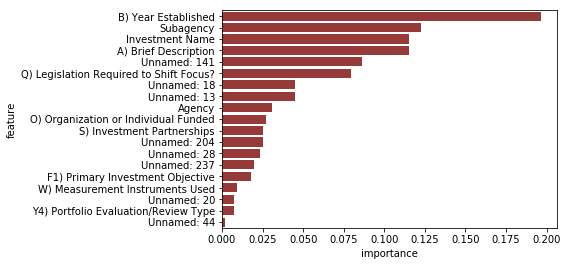

In [249]:
importance= xg.feature_importances_
importance = pd.DataFrame({'importance':importance,'feature':names})
importance = importance.sort_values(by ='importance',ascending=False)
importance = importance[importance['importance'] >0]
sns.barplot(importance['importance'],importance['feature'],color='brown')